
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

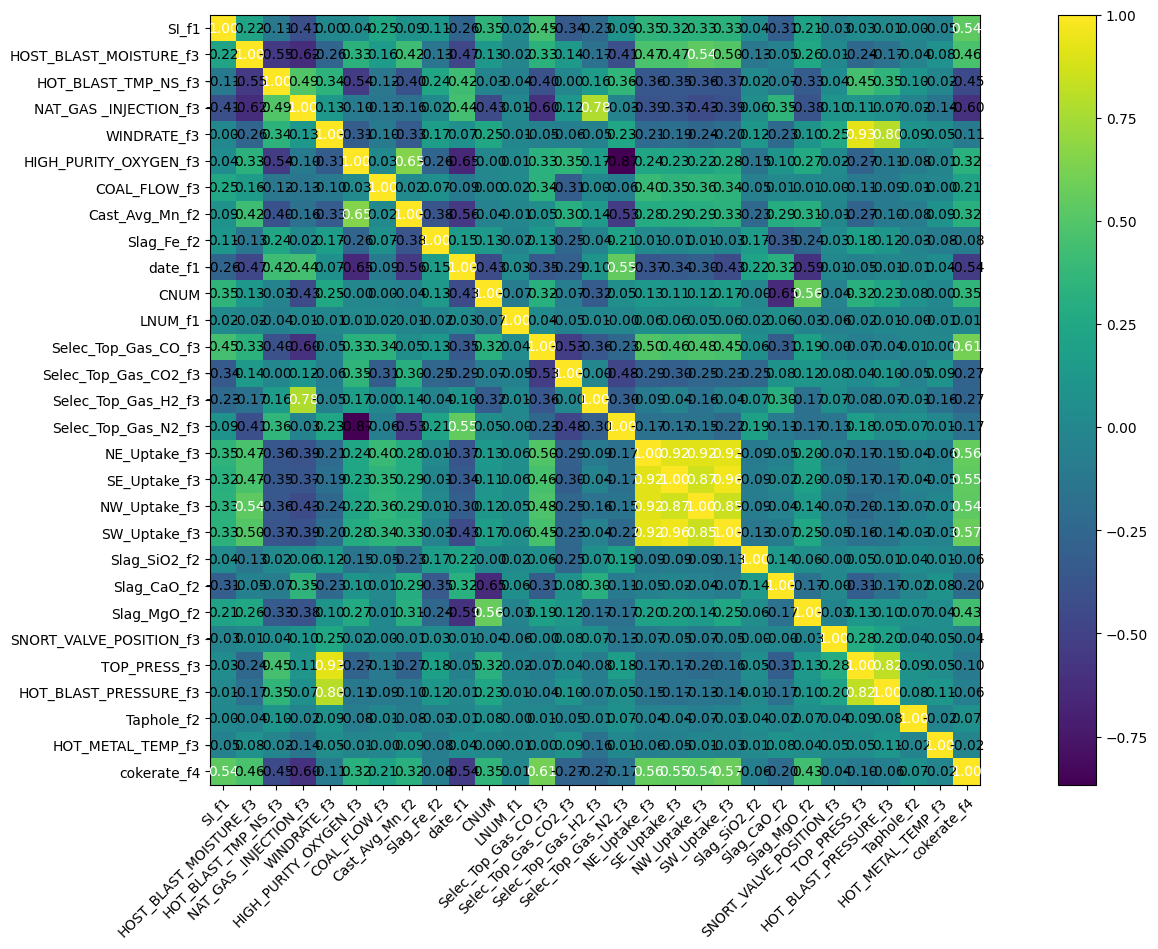

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

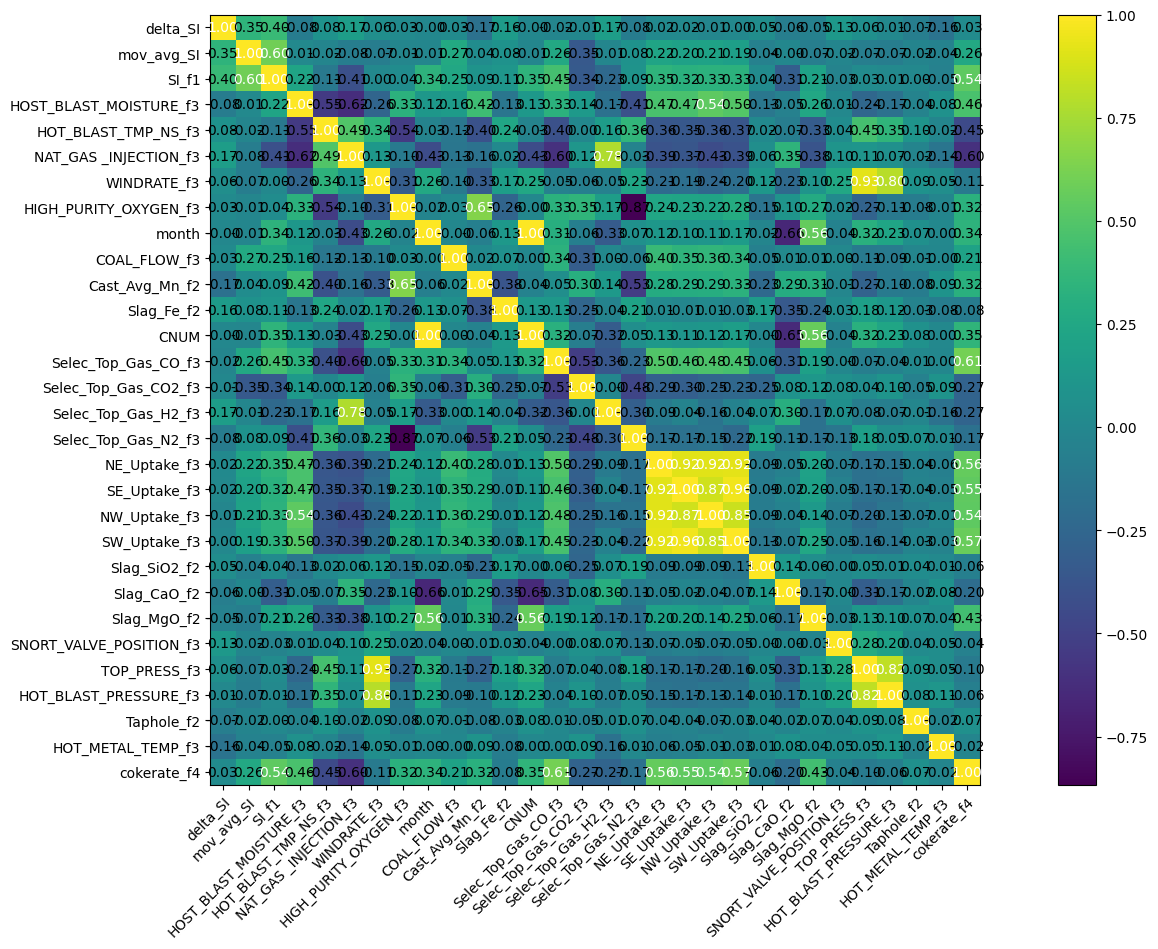

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        pred = idx_pred[:, -1:, :]
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        
        ###################################################################################
        
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
        ###################################################################################
        
        loss_just_last   = criterion( pred, y_train)   ## just 9th of 9
        
        ## print(idx_pred.shape)
        ## print(yb.shape)
        ## print(xb.shape)
        ## print(idx_pred[:,-10:, :].shape)
        loss_full_seq    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 9 of 9
        
        all_sequence = True
        
        if all_sequence:
            loss_all = loss_full_seq
        else:
            loss_all = loss_just_last
        
        ###################################################################################
        
        
        ## loss_SI  = criterion(pred_si, y_si)    
        loss_mse  = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        ## loss_SI_main = criterion(pred_si, y_si)
        y_si_early   = yb[:, :1, 2]                  # first 4 steps of SI ground truth
        si_mean_early = y_si_early.mean(dim=1)       # average over early steps
        early_penalty = F.mse_loss(pred_si, si_mean_early)
        beta    = 0  # how much to weigh the early trend alignment (can try 0.2–0.4)
        ## beta       = 0.3 * (1 - batch_i / tsGPT_obj.max_iters)

        loss_SI = (1 - beta) * loss_SI_main + beta * early_penalty
        
        
        ##################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.393630
Loss_SI: 0.33800333738327026 Loss_all: 0.8942718505859375
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.058794
Loss_SI: 0.01678948663175106 Loss_all: 0.4368361532688141
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.048593
Loss_SI: 0.016696177423000336 Loss_all: 0.3356655538082123
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.033653
Loss_SI: 0.006465620826929808 Loss_all: 0.2783416211605072
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.041408
Loss_SI: 0.01260283961892128 Loss_all: 0.30065515637397766
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.037391
Loss_SI: 0.010218648239970207 Loss_all: 0.28194379806518555
Prediction shape: torch.Size([32, 35])
===


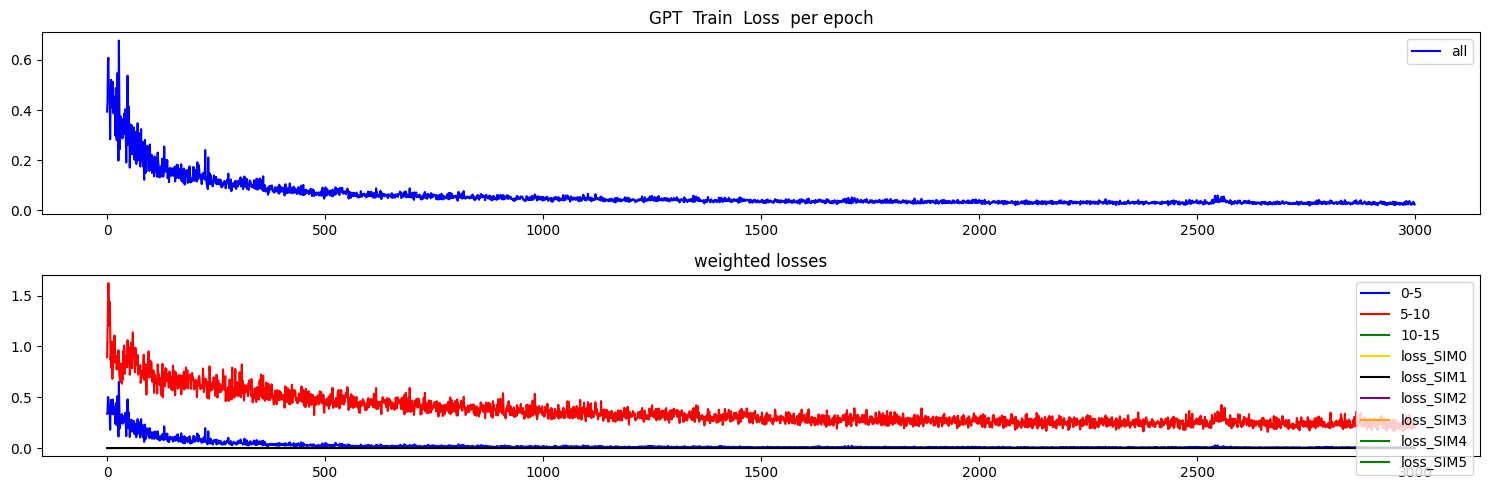

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


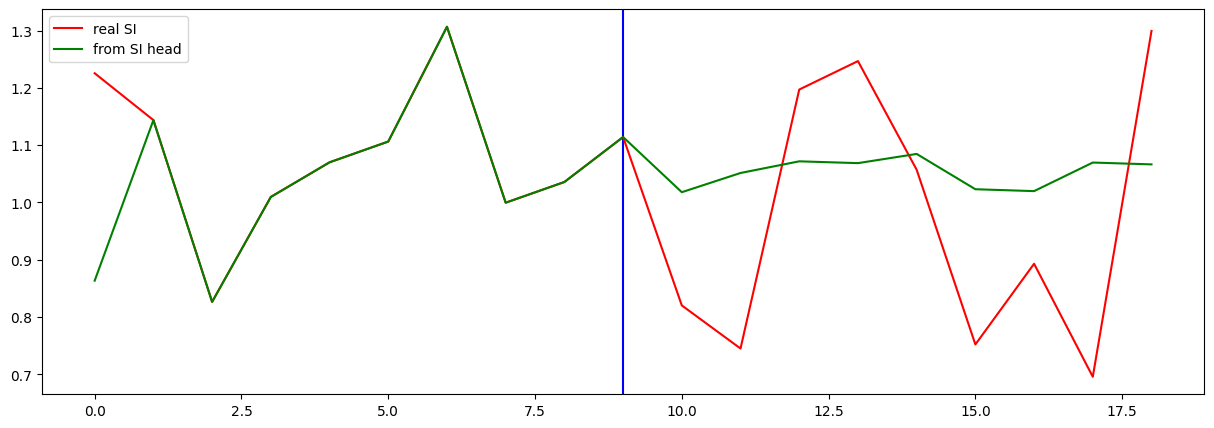

Testing R**2 - (all) - (no inputs):  0.9060100091733181
Testing R**2 - (f2) - SI full (no inputs):  -0.7673170871548973
Testing R**2 - SI head only (no inputs):  0.07518039498040407
0 ...index R**2 (no inputs):  -0.5826879887829364
1 ...index R**2 (no inputs):  -1.3275656909860518
2 ...index R**2 (no inputs):  -0.7673170871548973
3 ...index R**2 (no inputs):  -0.209194970494339
4 ...index R**2 (no inputs):  -0.1920909501950121
5 ...index R**2 (no inputs):  -0.8222274325508627
6 ...index R**2 (no inputs):  -19.204475448511104
7 ...index R**2 (no inputs):  -6.509862569881727
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.9095692489293667
10 ...index R**2 (no inputs):  -0.15105379069350278
11 ...index R**2 (no inputs):  -40.00248860862827
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.2978686055162605
16 ...index R**2 (no inputs):  -0.5328480666434414
17 ...index R**2 (no inputs

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.928166
Loss_SI: 0.8569603562355042 Loss_all: 1.5690171718597412
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.165791
Loss_SI: 0.09051832556724548 Loss_all: 0.8432477712631226
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.082058
Loss_SI: 0.03055579587817192 Loss_all: 0.5455765724182129
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.128740
Loss_SI: 0.07336165755987167 Loss_all: 0.6271447539329529
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.068769
Loss_SI: 0.021754620596766472 Loss_all: 0.4918994903564453
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.052682
Loss_SI: 0.012684350833296776 Loss_all: 0.41266560554504395
Prediction shape: torch.Size([32, 35])
===


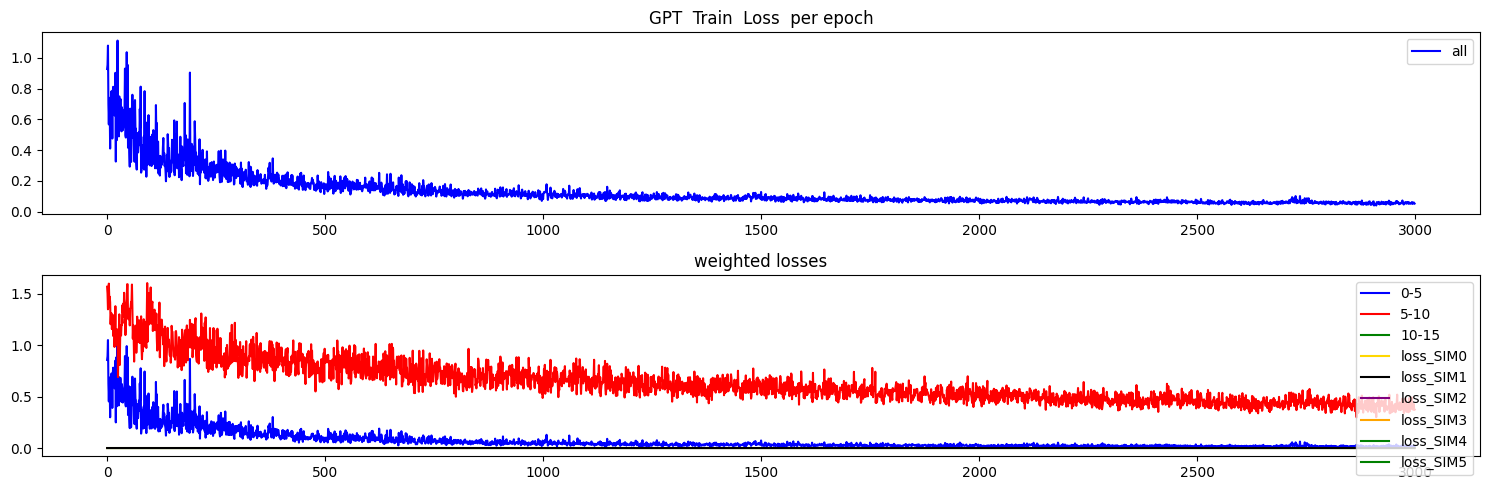

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


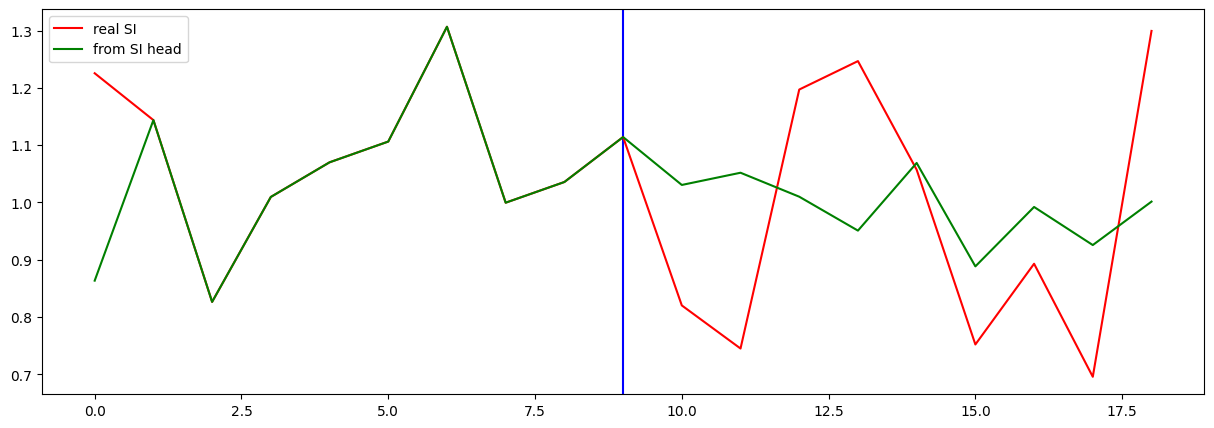

Testing R**2 - (all) - (no inputs):  0.9520911898992658
Testing R**2 - (f2) - SI full (no inputs):  -0.12236293552475419
Testing R**2 - SI head only (no inputs):  -0.15972838399697653
0 ...index R**2 (no inputs):  -0.5033763491309851
1 ...index R**2 (no inputs):  -0.4044089177187702
2 ...index R**2 (no inputs):  -0.12236293552475419
3 ...index R**2 (no inputs):  -28.329066423895114
4 ...index R**2 (no inputs):  -0.14389002715375088
5 ...index R**2 (no inputs):  0.07192541760146842
6 ...index R**2 (no inputs):  -30.763969612586568
7 ...index R**2 (no inputs):  -3.040935938950671
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5361616107478688
10 ...index R**2 (no inputs):  0.11059680092518354
11 ...index R**2 (no inputs):  -83.65658522157277
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.3116677352256665
16 ...index R**2 (no inputs):  -0.22281617565174283
17 ...index R**2 (no i

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.446276
Loss_SI: 0.37931570410728455 Loss_all: 1.0489192008972168
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.180494
Loss_SI: 0.13488547503948212 Loss_all: 0.5909731984138489
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.143880
Loss_SI: 0.07119692862033844 Loss_all: 0.798026442527771
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.075765
Loss_SI: 0.036157213151454926 Loss_all: 0.43223291635513306
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.083664
Loss_SI: 0.035765476524829865 Loss_all: 0.514751672744751
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.074909
Loss_SI: 0.03145957738161087 Loss_all: 0.4659576416015625
Prediction shape: torch.Size([32, 35])
===


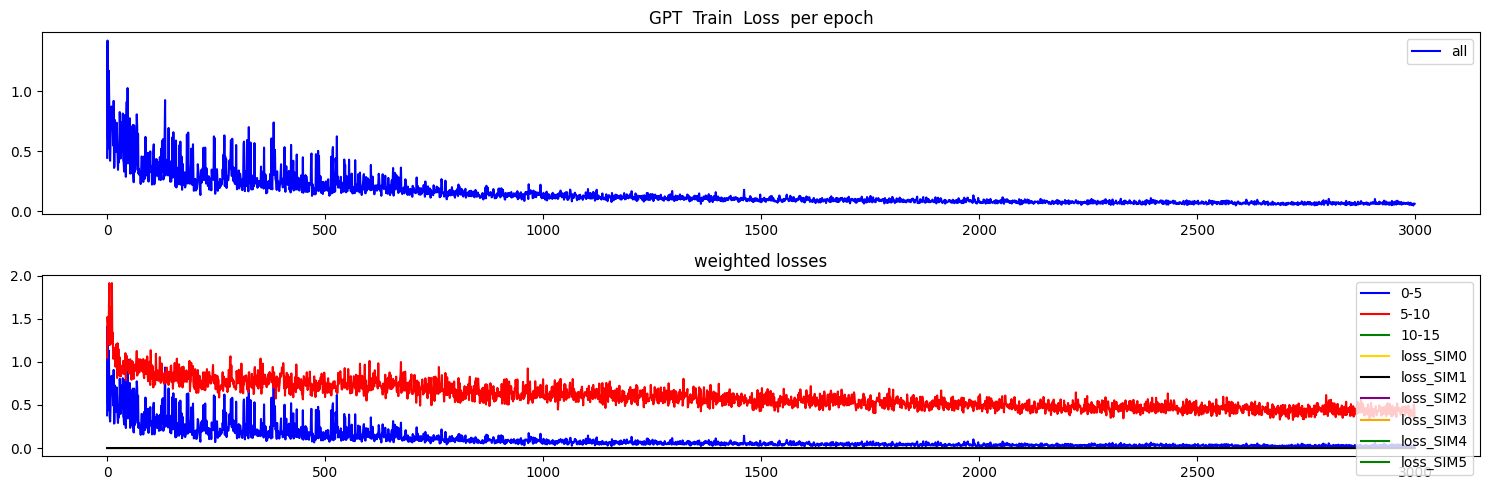

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


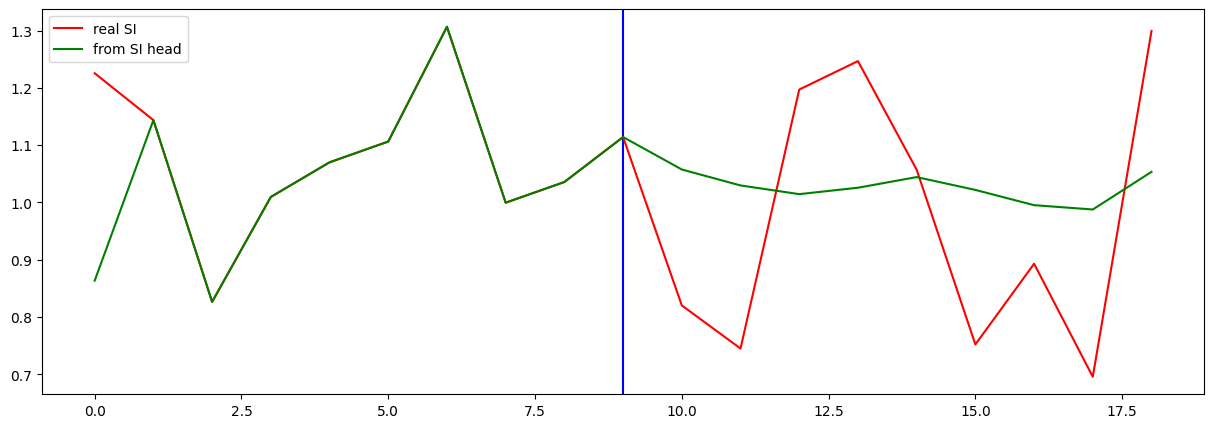

Testing R**2 - (all) - (no inputs):  0.9468026032296797
Testing R**2 - (f2) - SI full (no inputs):  -0.49737259774085496
Testing R**2 - SI head only (no inputs):  -0.05595131937835607
0 ...index R**2 (no inputs):  -0.24292754400919447
1 ...index R**2 (no inputs):  -0.7608013692519124
2 ...index R**2 (no inputs):  -0.49737259774085496
3 ...index R**2 (no inputs):  -16.119620018002518
4 ...index R**2 (no inputs):  -0.39183343296708606
5 ...index R**2 (no inputs):  -0.03086524829009618
6 ...index R**2 (no inputs):  -44.15134762057343
7 ...index R**2 (no inputs):  -78.42574773850075
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.5395251822552791
10 ...index R**2 (no inputs):  -0.393565915846654
11 ...index R**2 (no inputs):  -37.94072824767804
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.050499316133812
16 ...index R**2 (no inputs):  -0.18783645961909246
17 ...index R**2 (no in

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.786853
Loss_SI: 0.7413580417633057 Loss_all: 1.1963112354278564
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.229710
Loss_SI: 0.18979786336421967 Loss_all: 0.5889204740524292
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.184410
Loss_SI: 0.12061513960361481 Loss_all: 0.7585609555244446
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.113538
Loss_SI: 0.0733032152056694 Loss_all: 0.4756527245044708
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.075731
Loss_SI: 0.03142695873975754 Loss_all: 0.47447142004966736
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.071987
Loss_SI: 0.032844774425029755 Loss_all: 0.42426902055740356
Prediction shape: torch.Size([32, 35])
===


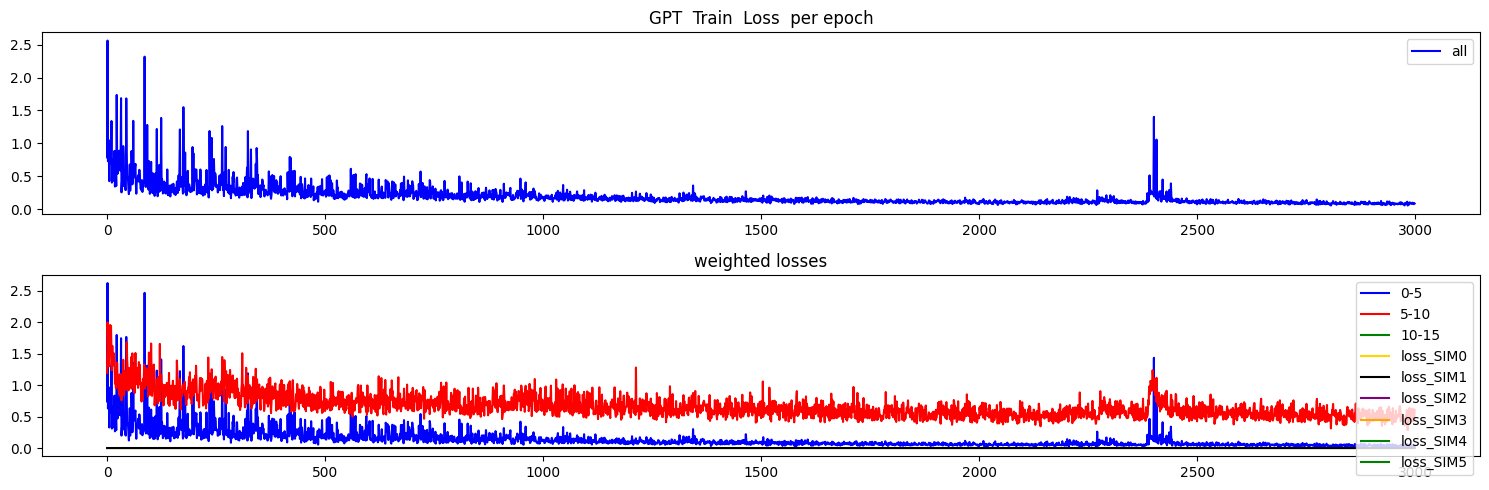

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


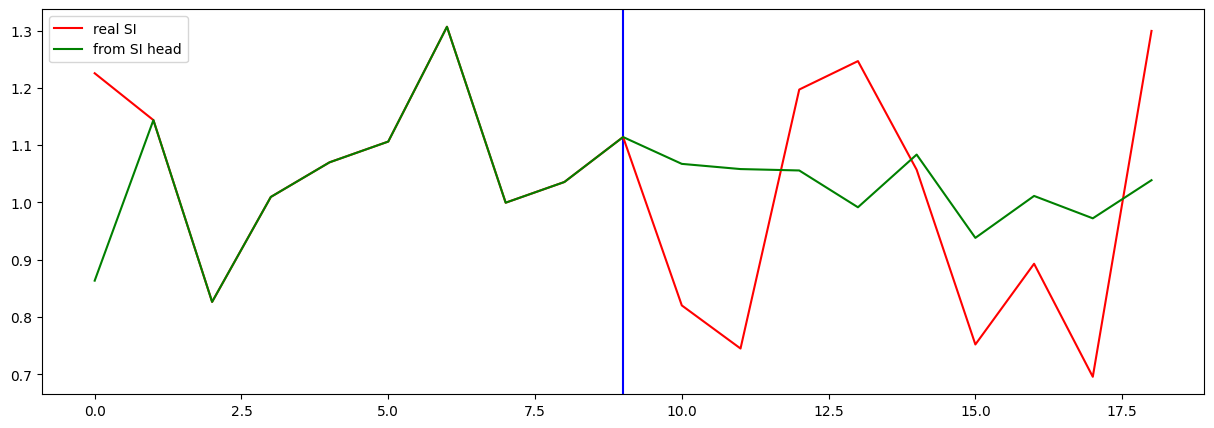

Testing R**2 - (all) - (no inputs):  0.9547268158734337
Testing R**2 - (f2) - SI full (no inputs):  -0.1163265419735291
Testing R**2 - SI head only (no inputs):  -0.09456274210872961
0 ...index R**2 (no inputs):  0.045863800853652825
1 ...index R**2 (no inputs):  0.01901440485239647
2 ...index R**2 (no inputs):  -0.1163265419735291
3 ...index R**2 (no inputs):  -12.064803009827099
4 ...index R**2 (no inputs):  -1.4839452288303017
5 ...index R**2 (no inputs):  0.12233570997835974
6 ...index R**2 (no inputs):  -26.20781862847895
7 ...index R**2 (no inputs):  -62.19116282623498
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5058515768415428
10 ...index R**2 (no inputs):  0.00856531161388796
11 ...index R**2 (no inputs):  -466.825517924208
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.9527304885906505
16 ...index R**2 (no inputs):  -0.7093954152643918
17 ...index R**2 (no inputs

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.578679
Loss_SI: 0.49358314275741577 Loss_all: 1.3445411920547485
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.079206
Loss_SI: 0.03325015306472778 Loss_all: 0.4928094446659088
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.044290
Loss_SI: 0.011687829159200191 Loss_all: 0.33770835399627686
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.046819
Loss_SI: 0.017328394576907158 Loss_all: 0.3122355043888092
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.039119
Loss_SI: 0.012529077008366585 Loss_all: 0.2784249782562256
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.031702
Loss_SI: 0.005482509266585112 Loss_all: 0.26767945289611816
Prediction shape: torch.Size([32, 35])
===


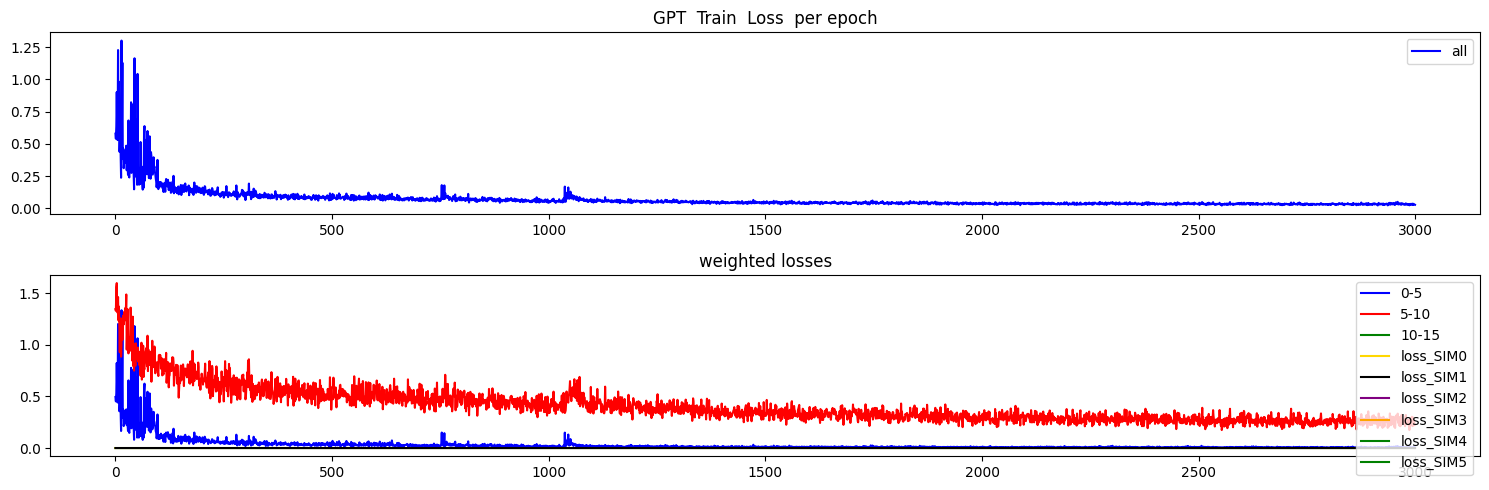

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


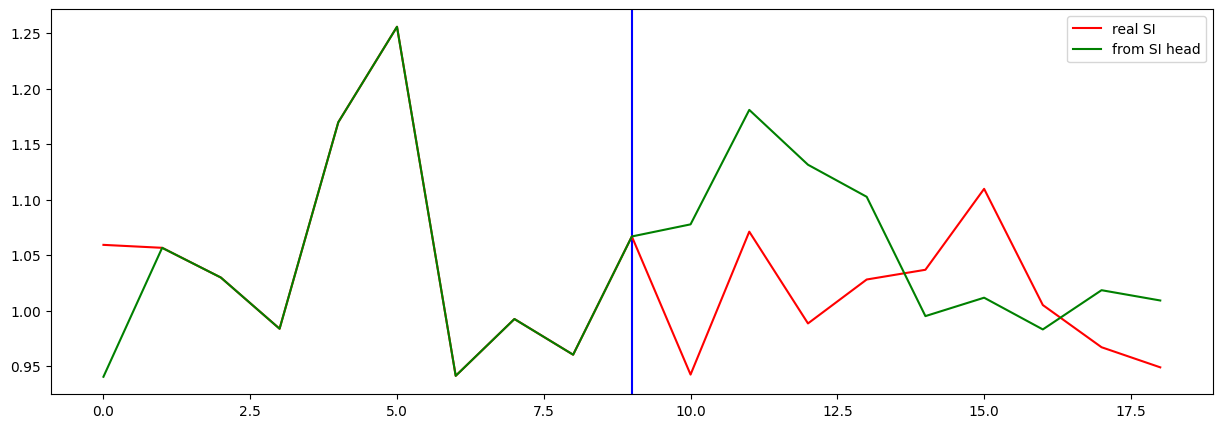

Testing R**2 - (all) - (no inputs):  0.9818864497499851
Testing R**2 - (f2) - SI full (no inputs):  -2.595261987416504
Testing R**2 - SI head only (no inputs):  -2.388560281126166
0 ...index R**2 (no inputs):  -2.7255333867360982
1 ...index R**2 (no inputs):  -7.762689441121525
2 ...index R**2 (no inputs):  -2.595261987416504
3 ...index R**2 (no inputs):  -1251.4317560158306
4 ...index R**2 (no inputs):  -597.657991259508
5 ...index R**2 (no inputs):  -4.411851479492556
6 ...index R**2 (no inputs):  -1.3874154147186148
7 ...index R**2 (no inputs):  -6.699606911327595
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.04872497041840629
10 ...index R**2 (no inputs):  -0.37415532530175355
11 ...index R**2 (no inputs):  0.07246722521011417
12 ...index R**2 (no inputs):  -0.2857020441799045
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -13.87167056899901
16 ...index R**2 (no inputs):  -0.5776568058654712
17 ...index R**2

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.823443
Loss_SI: 0.7527691721916199 Loss_all: 1.4595078229904175
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.095994
Loss_SI: 0.056809935718774796 Loss_all: 0.4486507773399353
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.089374
Loss_SI: 0.0461624339222908 Loss_all: 0.47827979922294617
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.073623
Loss_SI: 0.029963193461298943 Loss_all: 0.466561496257782
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.058555
Loss_SI: 0.020115923136472702 Loss_all: 0.40450751781463623
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.076057
Loss_SI: 0.033744268119335175 Loss_all: 0.45687517523765564
Prediction shape: torch.Size([32, 35])
===


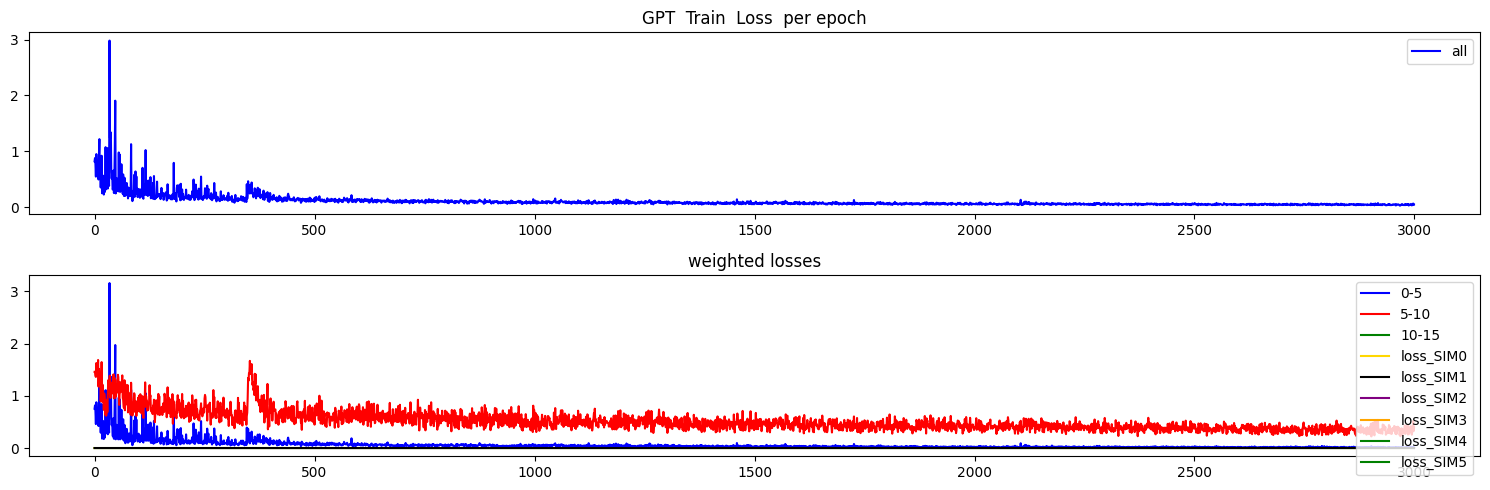

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


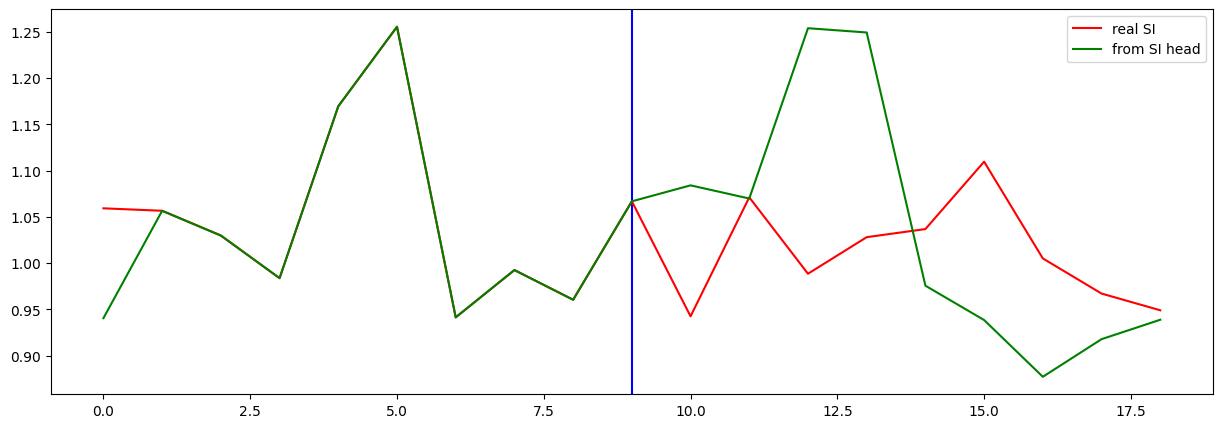

Testing R**2 - (all) - (no inputs):  0.9538937713817941
Testing R**2 - (f2) - SI full (no inputs):  -4.999043554984494
Testing R**2 - SI head only (no inputs):  -5.942494349810326
0 ...index R**2 (no inputs):  -1.3567540765513328
1 ...index R**2 (no inputs):  -5.845796864236819
2 ...index R**2 (no inputs):  -4.999043554984494
3 ...index R**2 (no inputs):  -609.0315902887579
4 ...index R**2 (no inputs):  -1587.2416316309948
5 ...index R**2 (no inputs):  -12.779563050386734
6 ...index R**2 (no inputs):  -0.4832352330703633
7 ...index R**2 (no inputs):  -7.220341020195049
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3280872873231513
10 ...index R**2 (no inputs):  -0.8295241093081744
11 ...index R**2 (no inputs):  -0.024064460474815697
12 ...index R**2 (no inputs):  -0.9228605700454835
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -16.939023029873145
16 ...index R**2 (no inputs):  -5.732819995183808
17 ...index R*

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.875212
Loss_SI: 0.7937965989112854 Loss_all: 1.607950210571289
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.203893
Loss_SI: 0.15044711530208588 Loss_all: 0.6849067211151123
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.079653
Loss_SI: 0.04272693395614624 Loss_all: 0.41199031472206116
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.131150
Loss_SI: 0.08402469754219055 Loss_all: 0.5552733540534973
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.090373
Loss_SI: 0.053005073219537735 Loss_all: 0.42668551206588745
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.070517
Loss_SI: 0.03368638828396797 Loss_all: 0.4019944369792938
Prediction shape: torch.Size([32, 35])
===


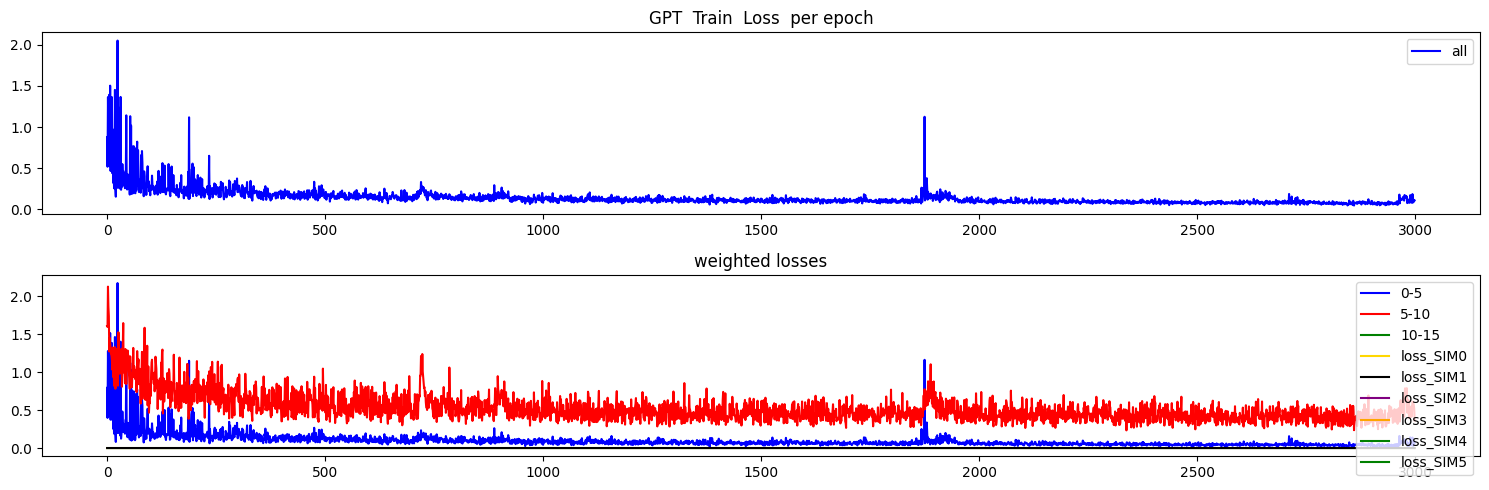

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


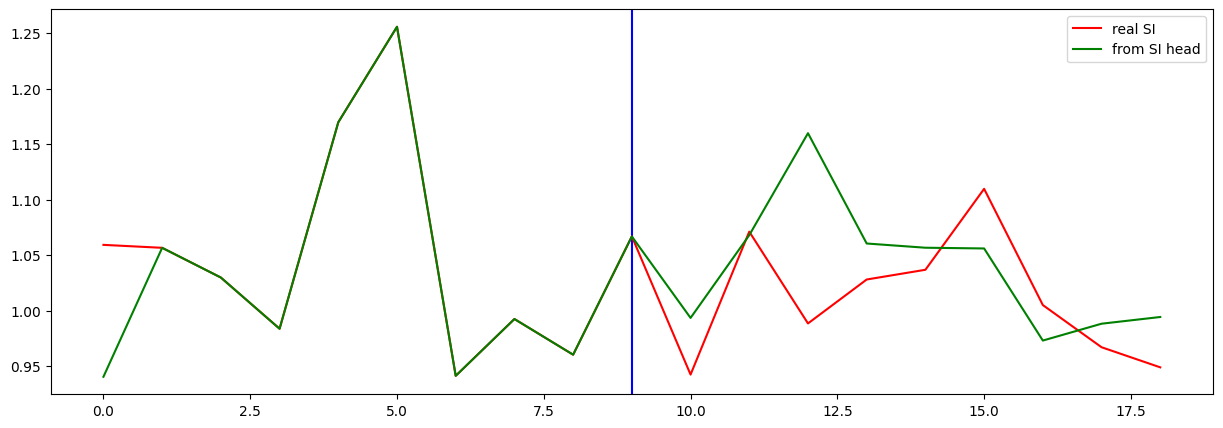

Testing R**2 - (all) - (no inputs):  0.9460343754802962
Testing R**2 - (f2) - SI full (no inputs):  -1.3167175342049005
Testing R**2 - SI head only (no inputs):  -0.9309284527903265
0 ...index R**2 (no inputs):  -0.2515677015407951
1 ...index R**2 (no inputs):  -3.633844581846362
2 ...index R**2 (no inputs):  -1.3167175342049005
3 ...index R**2 (no inputs):  -16320.118740982563
4 ...index R**2 (no inputs):  -11060.44616468169
5 ...index R**2 (no inputs):  -15.118516056009415
6 ...index R**2 (no inputs):  -0.11455710918196571
7 ...index R**2 (no inputs):  -49.47803254827009
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1949345503238793
10 ...index R**2 (no inputs):  -0.23846213632959468
11 ...index R**2 (no inputs):  0.18496357331857882
12 ...index R**2 (no inputs):  -10.855862348303386
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1896686236718423
16 ...index R**2 (no inputs):  -2.6368864505959366
17 ...inde

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.733889
Loss_SI: 0.6441712379455566 Loss_all: 1.5413450002670288
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.196869
Loss_SI: 0.1530335247516632 Loss_all: 0.5913881063461304
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.153810
Loss_SI: 0.11170659959316254 Loss_all: 0.5327422618865967
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.118260
Loss_SI: 0.05992012098431587 Loss_all: 0.6433216333389282
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.090772
Loss_SI: 0.06420405209064484 Loss_all: 0.3298850655555725
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.126407
Loss_SI: 0.07581380009651184 Loss_all: 0.5817415714263916
Prediction shape: torch.Size([32, 35])
===


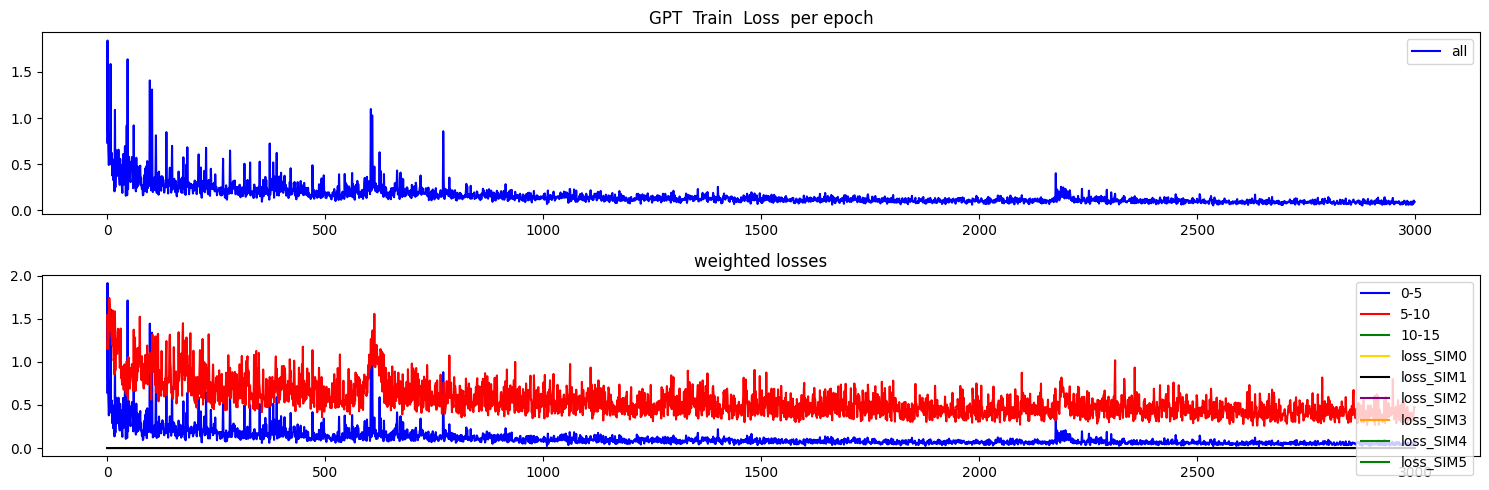

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


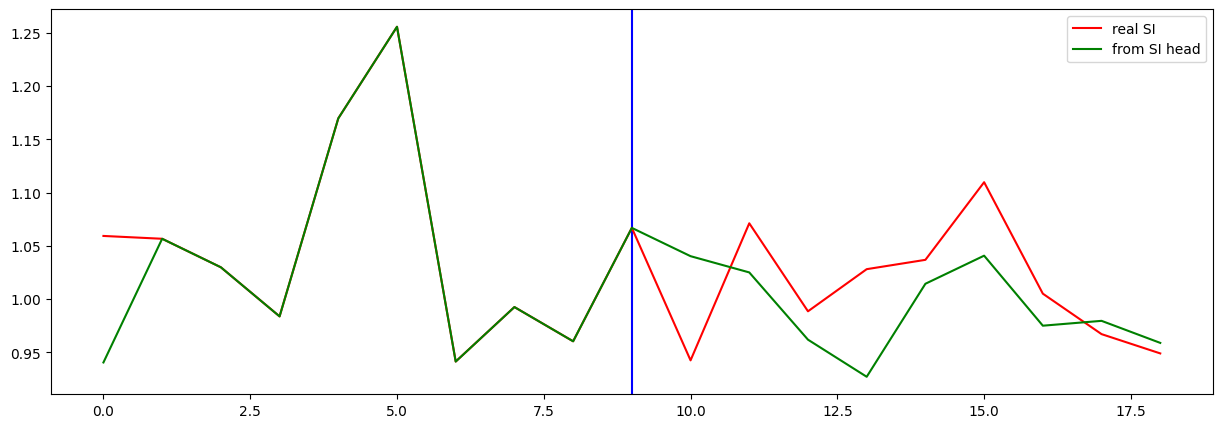

Testing R**2 - (all) - (no inputs):  0.9576016859772097
Testing R**2 - (f2) - SI full (no inputs):  -7.105956696594381
Testing R**2 - SI head only (no inputs):  -0.8699134094218639
0 ...index R**2 (no inputs):  0.15079733515366223
1 ...index R**2 (no inputs):  -3.3297681404217183
2 ...index R**2 (no inputs):  -7.105956696594381
3 ...index R**2 (no inputs):  -152.5174298177033
4 ...index R**2 (no inputs):  -1811.0622487060873
5 ...index R**2 (no inputs):  -11.711140509644421
6 ...index R**2 (no inputs):  -0.07505116427888137
7 ...index R**2 (no inputs):  -0.2794666247931663
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.18404081049634424
10 ...index R**2 (no inputs):  -0.15435088128329988
11 ...index R**2 (no inputs):  0.2446173373526801
12 ...index R**2 (no inputs):  -2.2600073339498437
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.626807716289443
16 ...index R**2 (no inputs):  -3.7100803314769273
17 ...index

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.466848
Loss_SI: 0.36332929134368896 Loss_all: 1.3985190391540527
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.109041
Loss_SI: 0.046185046434402466 Loss_all: 0.674745500087738
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.073974
Loss_SI: 0.019109133630990982 Loss_all: 0.5677555799484253
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.046764
Loss_SI: 0.008321568369865417 Loss_all: 0.392741858959198
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.044436
Loss_SI: 0.010191565379500389 Loss_all: 0.35263189673423767
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.034165
Loss_SI: 0.007794761098921299 Loss_all: 0.2715011537075043
Prediction shape: torch.Size([32, 35])
===


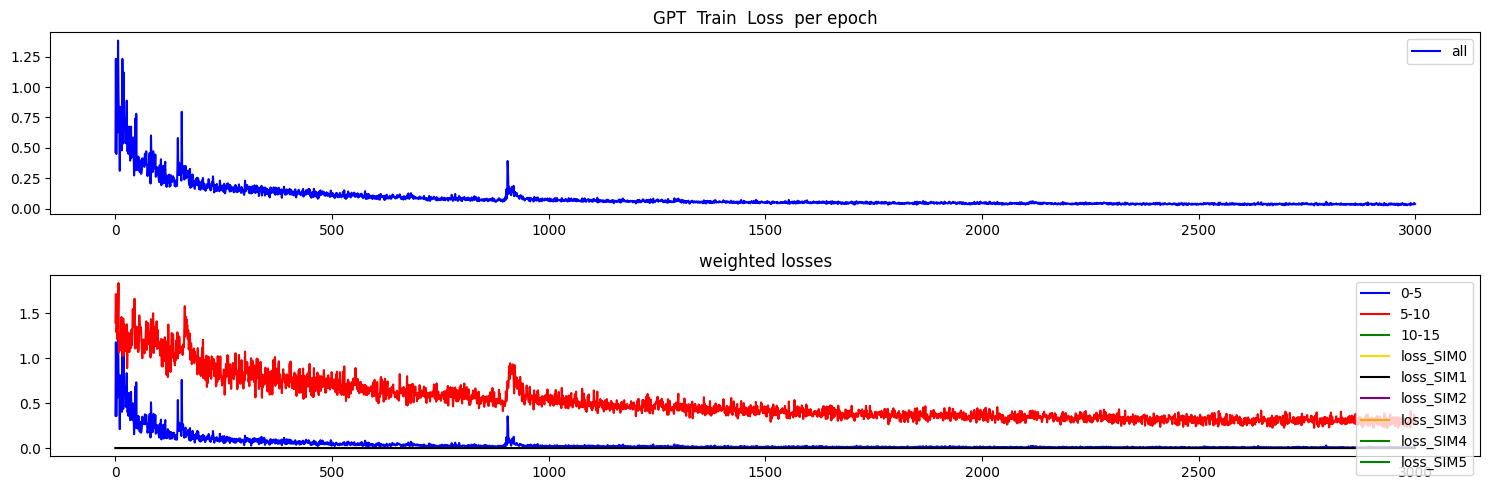

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


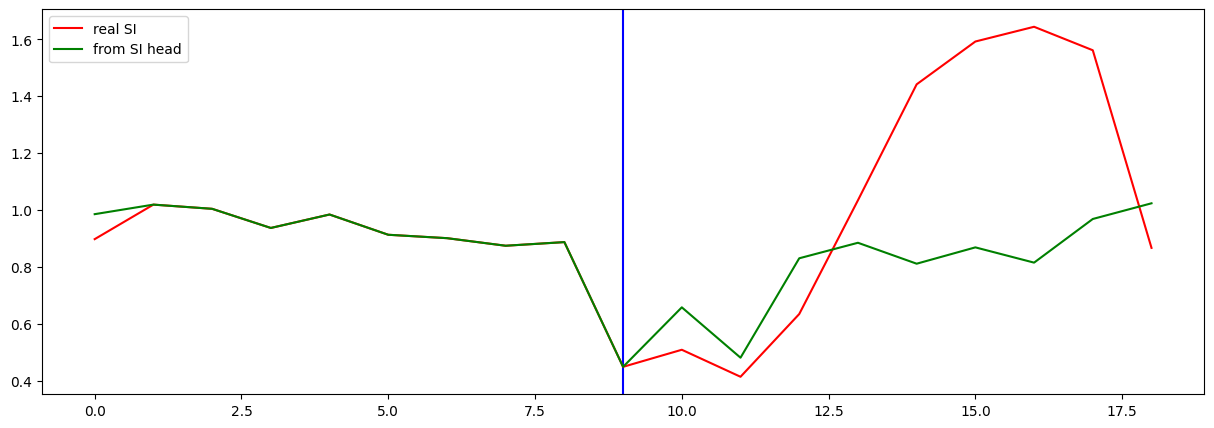

Testing R**2 - (all) - (no inputs):  0.6962104046058674
Testing R**2 - (f2) - SI full (no inputs):  -0.4875215812778395
Testing R**2 - SI head only (no inputs):  -0.34991440691656184
0 ...index R**2 (no inputs):  -0.04720729994290096
1 ...index R**2 (no inputs):  -3.039045942255986
2 ...index R**2 (no inputs):  -0.4875215812778395
3 ...index R**2 (no inputs):  -0.3695635419065244
4 ...index R**2 (no inputs):  -0.7141691605077187
5 ...index R**2 (no inputs):  -0.06472214248268426
6 ...index R**2 (no inputs):  -56.20107689776942
7 ...index R**2 (no inputs):  -1.7053322357223948
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.231870238919992
10 ...index R**2 (no inputs):  -3.276586713269353
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.27961851810538085
16 ...index R**2 (no inputs):  0.1222067160991942
17 ...index R**2 (no inputs):  -72.12413108

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.490711
Loss_SI: 0.3900412917137146 Loss_all: 1.3967348337173462
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.202280
Loss_SI: 0.1412210762500763 Loss_all: 0.7518060803413391
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.116991
Loss_SI: 0.06494717299938202 Loss_all: 0.5853819251060486
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.078746
Loss_SI: 0.028461890295147896 Loss_all: 0.5313005447387695
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.083389
Loss_SI: 0.028432687744498253 Loss_all: 0.5779959559440613
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.059327
Loss_SI: 0.016953766345977783 Loss_all: 0.4406864643096924
Prediction shape: torch.Size([32, 35])
===


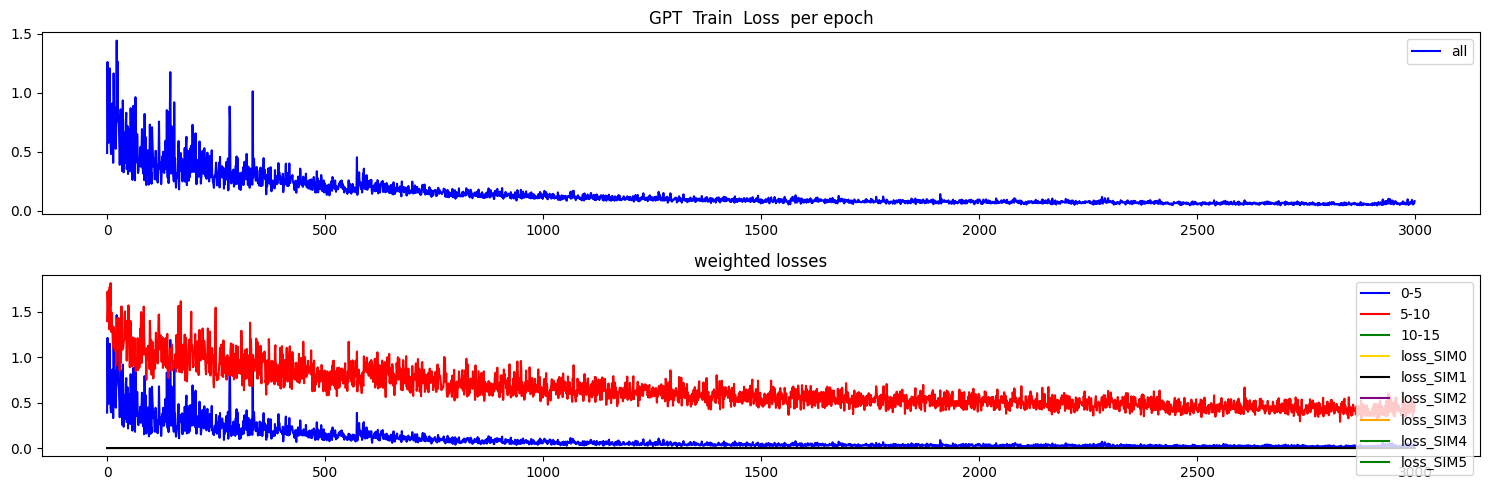

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


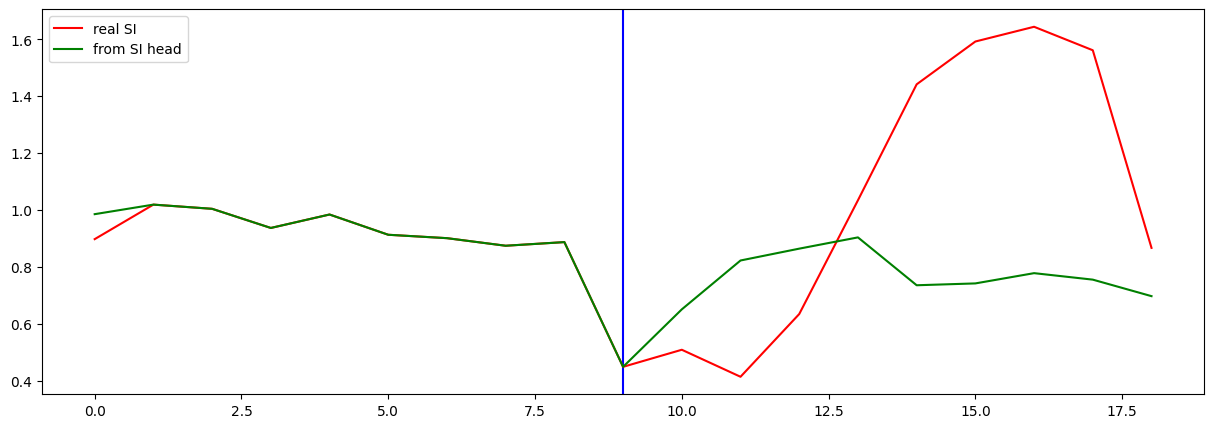

Testing R**2 - (all) - (no inputs):  0.5493317532198005
Testing R**2 - (f2) - SI full (no inputs):  -1.105775346904605
Testing R**2 - SI head only (no inputs):  -0.5888786153077585
0 ...index R**2 (no inputs):  -0.6636297911222975
1 ...index R**2 (no inputs):  -1.0061370135326122
2 ...index R**2 (no inputs):  -1.105775346904605
3 ...index R**2 (no inputs):  -0.16384537234955898
4 ...index R**2 (no inputs):  -0.8010625641113389
5 ...index R**2 (no inputs):  -0.5796547456373655
6 ...index R**2 (no inputs):  -47.0215178814696
7 ...index R**2 (no inputs):  -0.8630246092158671
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3753384960813613
10 ...index R**2 (no inputs):  -0.6328072027827716
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.35901729653565995
16 ...index R**2 (no inputs):  -0.3555401946055101
17 ...index R**2 (no inputs):  -1156.276838

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.479819
Loss_SI: 0.4165772795677185 Loss_all: 1.0489988327026367
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.137121
Loss_SI: 0.07132020592689514 Loss_all: 0.7293286323547363
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.128565
Loss_SI: 0.08265801519155502 Loss_all: 0.5417273640632629
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.091643
Loss_SI: 0.04119448363780975 Loss_all: 0.5456777215003967
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.095913
Loss_SI: 0.04220127314329147 Loss_all: 0.5793221592903137
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.064476
Loss_SI: 0.017851389944553375 Loss_all: 0.48409798741340637
Prediction shape: torch.Size([32, 35])
===


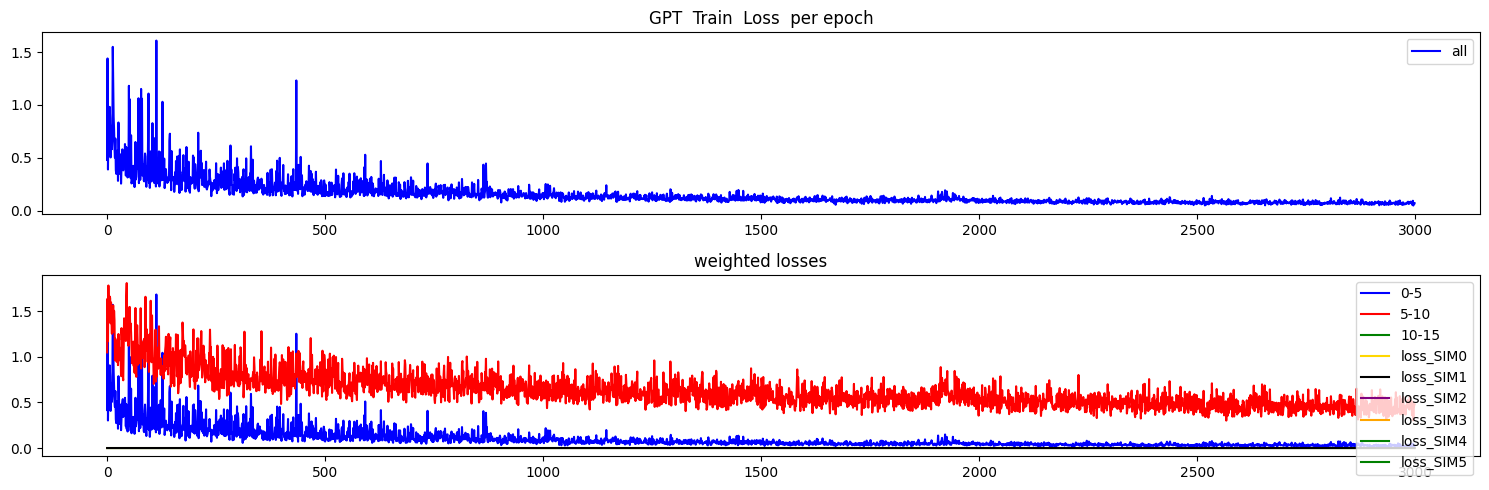

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


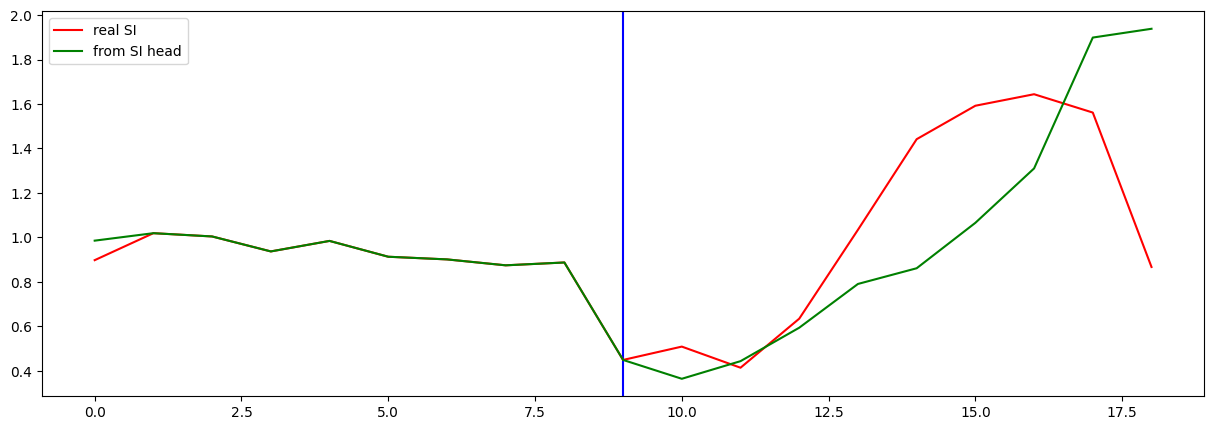

Testing R**2 - (all) - (no inputs):  0.749775531945994
Testing R**2 - (f2) - SI full (no inputs):  -0.4485760630359328
Testing R**2 - SI head only (no inputs):  -1.2631212239617122
0 ...index R**2 (no inputs):  0.3074418184908576
1 ...index R**2 (no inputs):  -0.5984882991596103
2 ...index R**2 (no inputs):  -0.4485760630359328
3 ...index R**2 (no inputs):  0.7461983041440693
4 ...index R**2 (no inputs):  -2.5834828560112655
5 ...index R**2 (no inputs):  0.1270749283741367
6 ...index R**2 (no inputs):  -583.0862061967769
7 ...index R**2 (no inputs):  0.640412415217517
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.585241034042237
10 ...index R**2 (no inputs):  -3.816715933212503
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.01803009501088426
16 ...index R**2 (no inputs):  0.03455413194667756
17 ...index R**2 (no inputs):  -2084.474813659986

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.804428
Loss_SI: 0.7599345445632935 Loss_all: 1.2048691511154175
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.194413
Loss_SI: 0.13233095407485962 Loss_all: 0.7531512379646301
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.167047
Loss_SI: 0.11402779817581177 Loss_all: 0.6442168951034546
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.171896
Loss_SI: 0.13610218465328217 Loss_all: 0.4940379559993744
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.095901
Loss_SI: 0.0515022911131382 Loss_all: 0.4954860210418701
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.102883
Loss_SI: 0.05581536889076233 Loss_all: 0.5264954566955566
Prediction shape: torch.Size([32, 35])
===


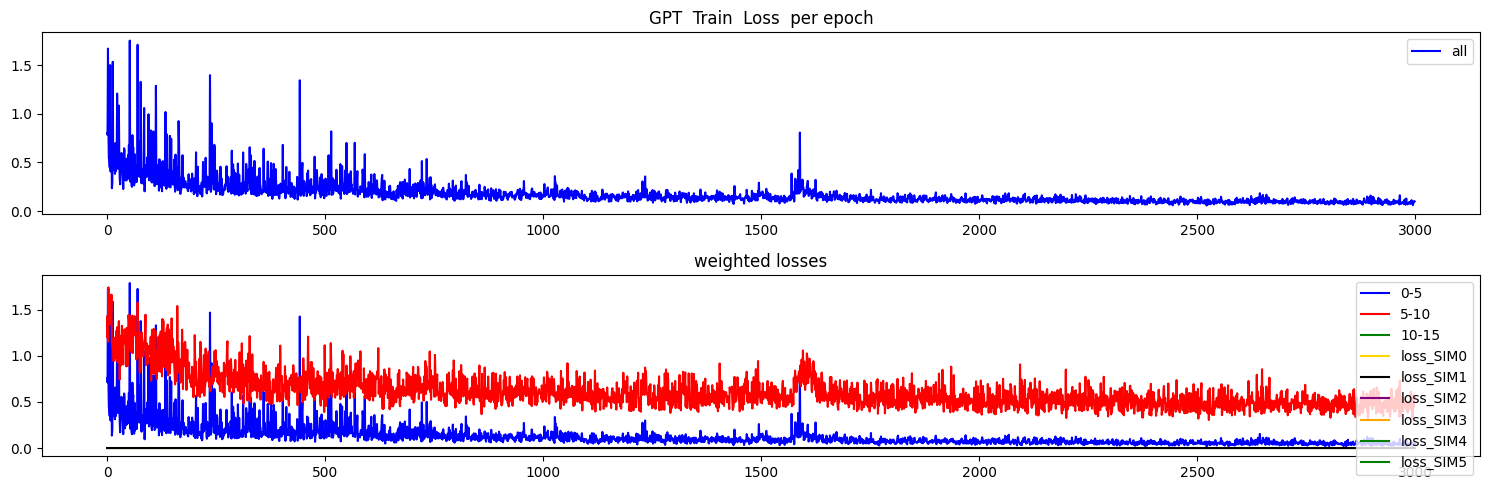

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


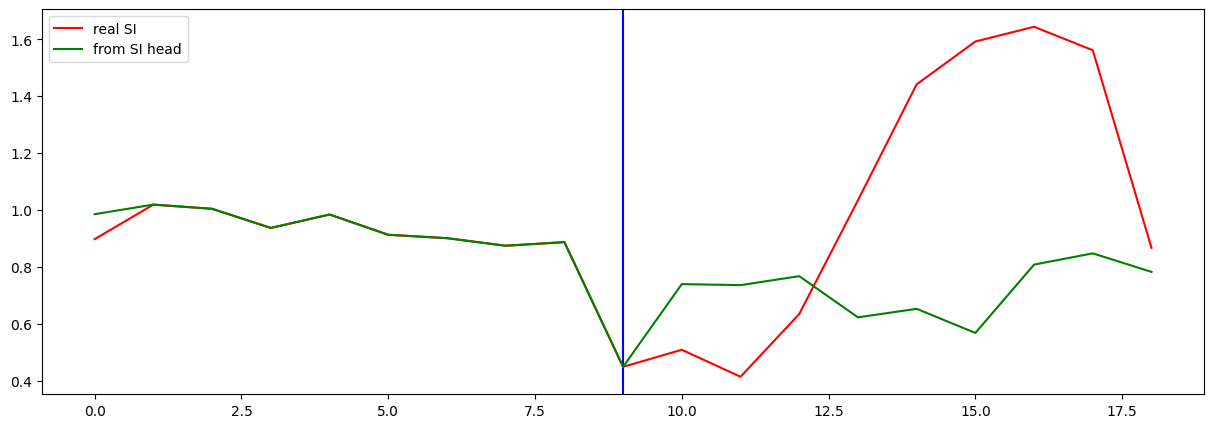

Testing R**2 - (all) - (no inputs):  0.40104417860340036
Testing R**2 - (f2) - SI full (no inputs):  -0.8002893430627875
Testing R**2 - SI head only (no inputs):  -1.1073338369372276
0 ...index R**2 (no inputs):  -0.5104159458468156
1 ...index R**2 (no inputs):  -0.5521213632906641
2 ...index R**2 (no inputs):  -0.8002893430627875
3 ...index R**2 (no inputs):  -0.7451793672637861
4 ...index R**2 (no inputs):  -0.8014033472360964
5 ...index R**2 (no inputs):  -1.0438941378659456
6 ...index R**2 (no inputs):  -133.39259260917373
7 ...index R**2 (no inputs):  -1.520562862697659
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.4420915524694422
10 ...index R**2 (no inputs):  -0.25657730995633266
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.776051828460077
16 ...index R**2 (no inputs):  -0.7511078173541039
17 ...index R**2 (no inputs):  -192827.30

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.555730
Loss_SI: 0.5118817090988159 Loss_all: 0.9503644704818726
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.089736
Loss_SI: 0.03204626217484474 Loss_all: 0.6089387536048889
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.075879
Loss_SI: 0.015704484656453133 Loss_all: 0.6174538731575012
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.055148
Loss_SI: 0.007530261296778917 Loss_all: 0.48370465636253357
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.033235
Loss_SI: 0.009777577593922615 Loss_all: 0.24434714019298553
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.030652
Loss_SI: 0.003718538675457239 Loss_all: 0.27305102348327637
Prediction shape: torch.Size([32, 35])
===


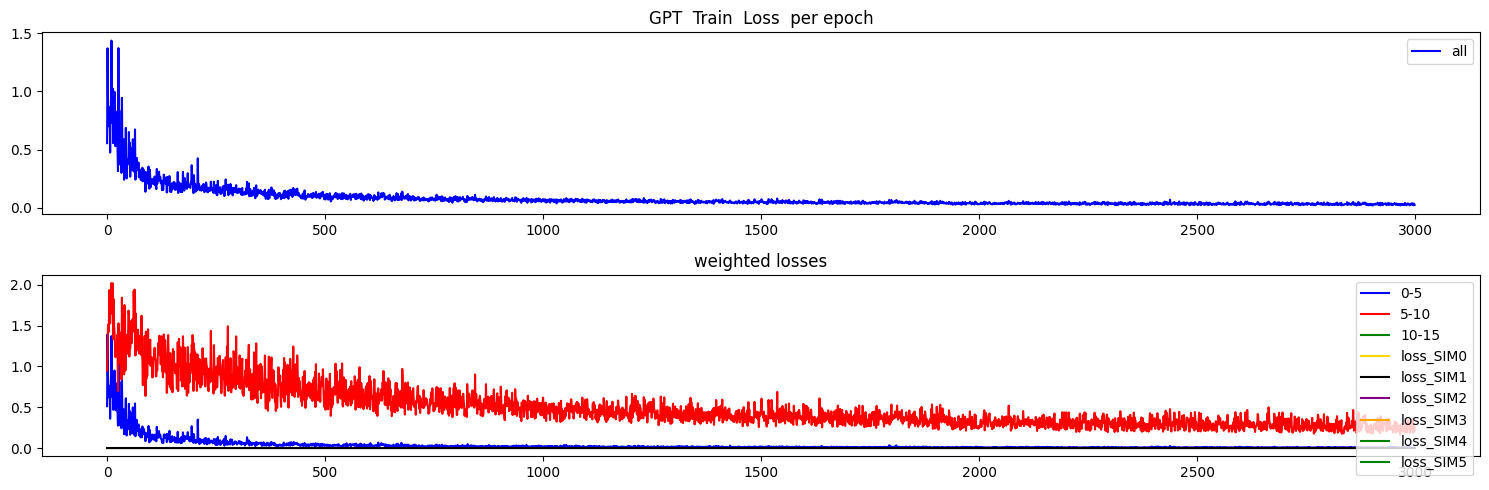

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


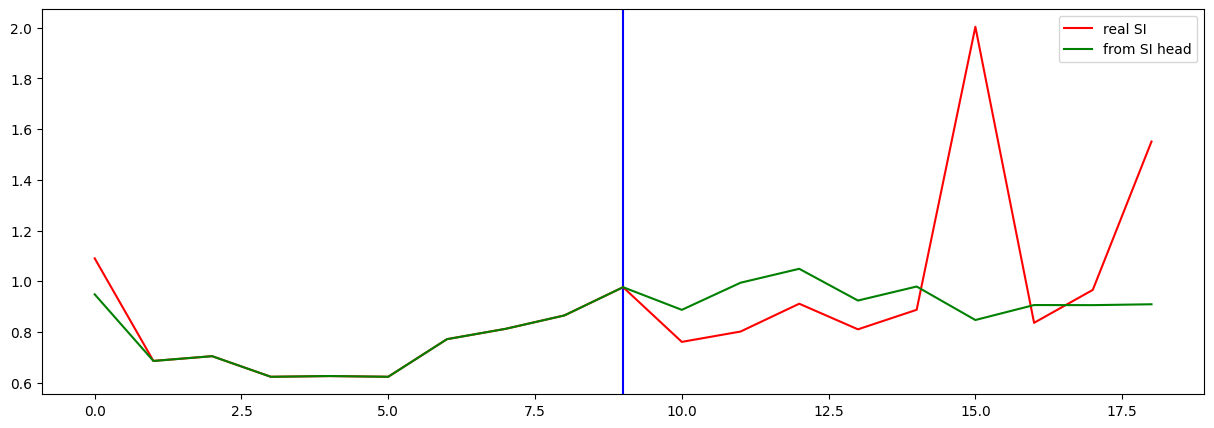

Testing R**2 - (all) - (no inputs):  0.9743538933038047
Testing R**2 - (f2) - SI full (no inputs):  -0.5588086577256521
Testing R**2 - SI head only (no inputs):  -0.1569508671747788
0 ...index R**2 (no inputs):  0.07896145571983604
1 ...index R**2 (no inputs):  -10.324890172195444
2 ...index R**2 (no inputs):  -0.5588086577256521
3 ...index R**2 (no inputs):  -0.48390541632057493
4 ...index R**2 (no inputs):  -0.1330598345114049
5 ...index R**2 (no inputs):  -0.27014524386037464
6 ...index R**2 (no inputs):  -0.9822620612326487
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.04058896724706851
10 ...index R**2 (no inputs):  -0.131231846727347
11 ...index R**2 (no inputs):  -0.16829529594198256
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.928158352376165
16 ...index R**2 (no inputs):  -0.2609804732486476
17 ...index R**2 (no inputs):  -204.320

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.784683
Loss_SI: 0.7246440052986145 Loss_all: 1.3250294923782349
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.188516
Loss_SI: 0.14170856773853302 Loss_all: 0.6097825765609741
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.085932
Loss_SI: 0.03640196472406387 Loss_all: 0.5317026376724243
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.074199
Loss_SI: 0.018060680478811264 Loss_all: 0.5794399976730347
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.081367
Loss_SI: 0.02798977866768837 Loss_all: 0.5617660284042358
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.044144
Loss_SI: 0.010675390250980854 Loss_all: 0.34536176919937134
Prediction shape: torch.Size([32, 35])
===


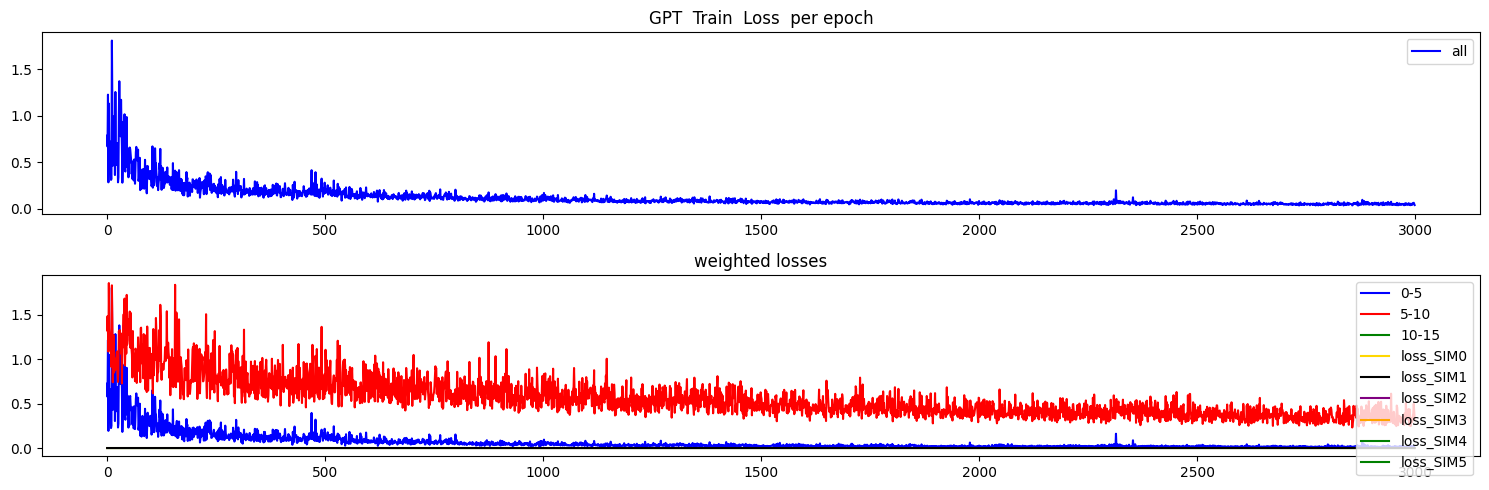

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


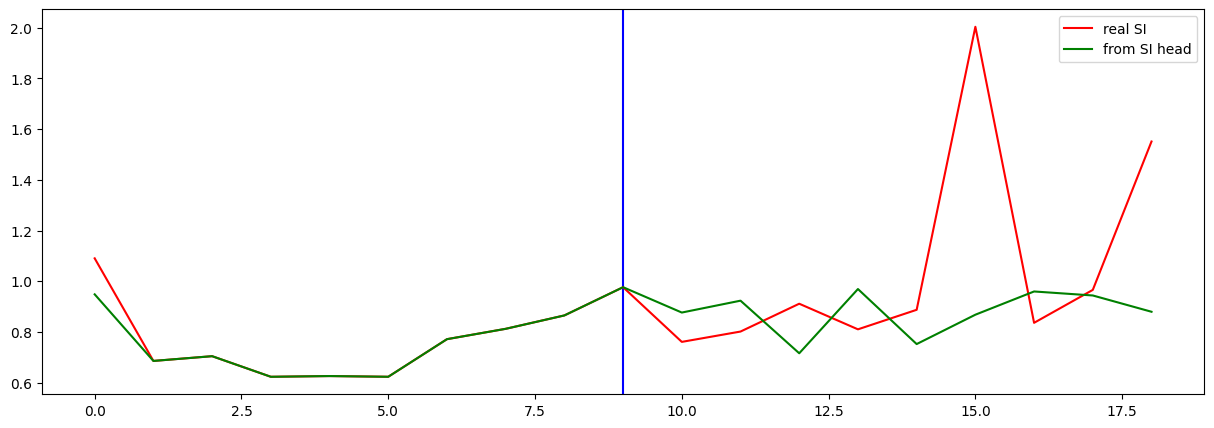

Testing R**2 - (all) - (no inputs):  0.9725664943065911
Testing R**2 - (f2) - SI full (no inputs):  -0.2940274619451235
Testing R**2 - SI head only (no inputs):  -0.470283558633368
0 ...index R**2 (no inputs):  -0.13068686204199365
1 ...index R**2 (no inputs):  -1.2235616858894605
2 ...index R**2 (no inputs):  -0.2940274619451235
3 ...index R**2 (no inputs):  -0.6169131781595245
4 ...index R**2 (no inputs):  -0.0955463299974586
5 ...index R**2 (no inputs):  -0.35938214856555106
6 ...index R**2 (no inputs):  -0.029714866561540765
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1933441107885725
10 ...index R**2 (no inputs):  -0.680303755906448
11 ...index R**2 (no inputs):  -2.4960318294082438
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.9828798530892366
16 ...index R**2 (no inputs):  -4.215127022349025
17 ...index R**2 (no inputs):  -75.83059

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.796969
Loss_SI: 0.770951509475708 Loss_all: 1.031126856803894
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.147247
Loss_SI: 0.10929518938064575 Loss_all: 0.48881402611732483
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.151805
Loss_SI: 0.10810945928096771 Loss_all: 0.5450657606124878
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.103259
Loss_SI: 0.04978259652853012 Loss_all: 0.5845491886138916
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.089382
Loss_SI: 0.029963944107294083 Loss_all: 0.6241444945335388
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.074376
Loss_SI: 0.033871911466121674 Loss_all: 0.43891239166259766
Prediction shape: torch.Size([32, 35])
===


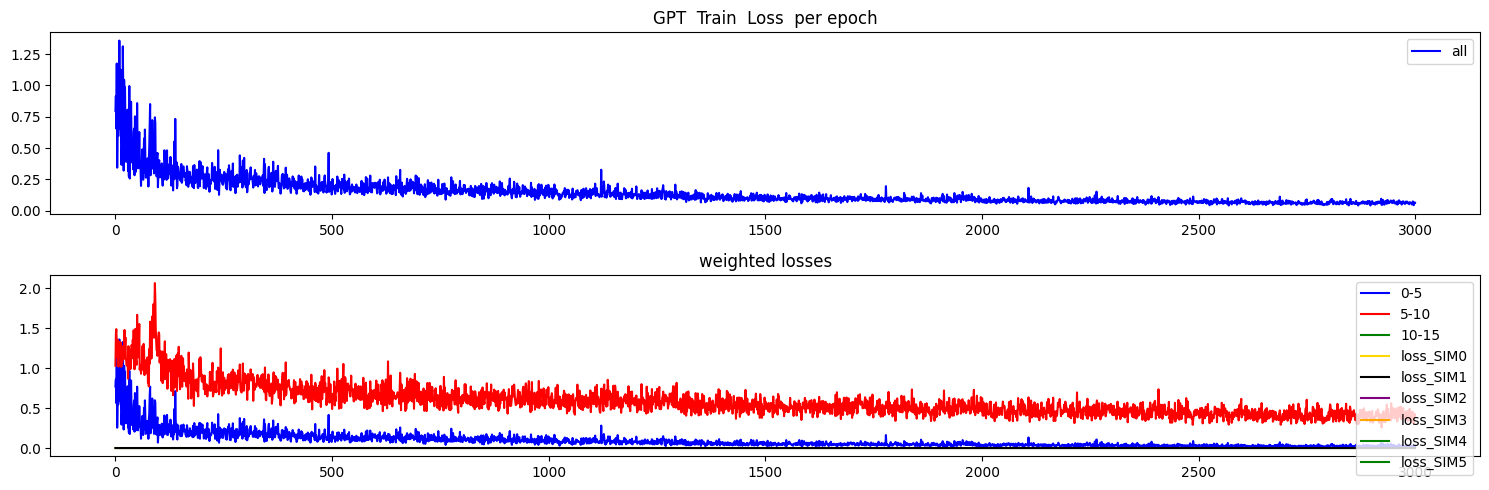

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


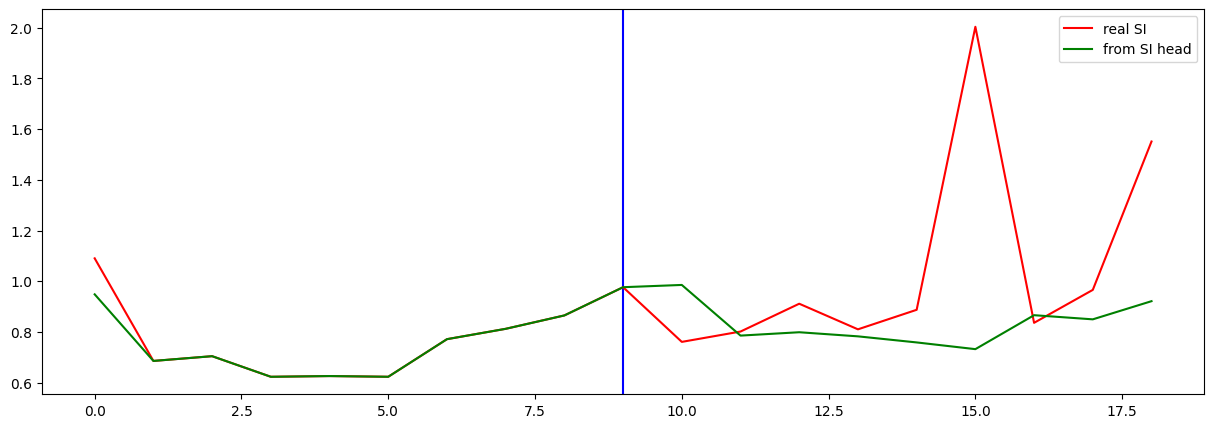

Testing R**2 - (all) - (no inputs):  0.9681789642547507
Testing R**2 - (f2) - SI full (no inputs):  -0.1886827561480071
Testing R**2 - SI head only (no inputs):  -0.580615216981647
0 ...index R**2 (no inputs):  -0.03338554922608772
1 ...index R**2 (no inputs):  -7.605370836187314
2 ...index R**2 (no inputs):  -0.1886827561480071
3 ...index R**2 (no inputs):  -4.957133134647683
4 ...index R**2 (no inputs):  -0.053437310599128596
5 ...index R**2 (no inputs):  -0.5784575281979172
6 ...index R**2 (no inputs):  -0.6329817047487751
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.34473396401414846
10 ...index R**2 (no inputs):  -0.9321183880213988
11 ...index R**2 (no inputs):  -0.48278730512891954
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.01271554878869785
16 ...index R**2 (no inputs):  -4.193867968186222
17 ...index R**2 (no inputs):  -6.42423

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.975784
Loss_SI: 0.9448275566101074 Loss_all: 1.2543888092041016
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.298822
Loss_SI: 0.22842024266719818 Loss_all: 0.9324331879615784
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.270271
Loss_SI: 0.2249535173177719 Loss_all: 0.6781286597251892
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.135636
Loss_SI: 0.06653328984975815 Loss_all: 0.7575638294219971
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.099047
Loss_SI: 0.04472169280052185 Loss_all: 0.5879760384559631
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.081374
Loss_SI: 0.042206328362226486 Loss_all: 0.4338821470737457
Prediction shape: torch.Size([32, 35])
===


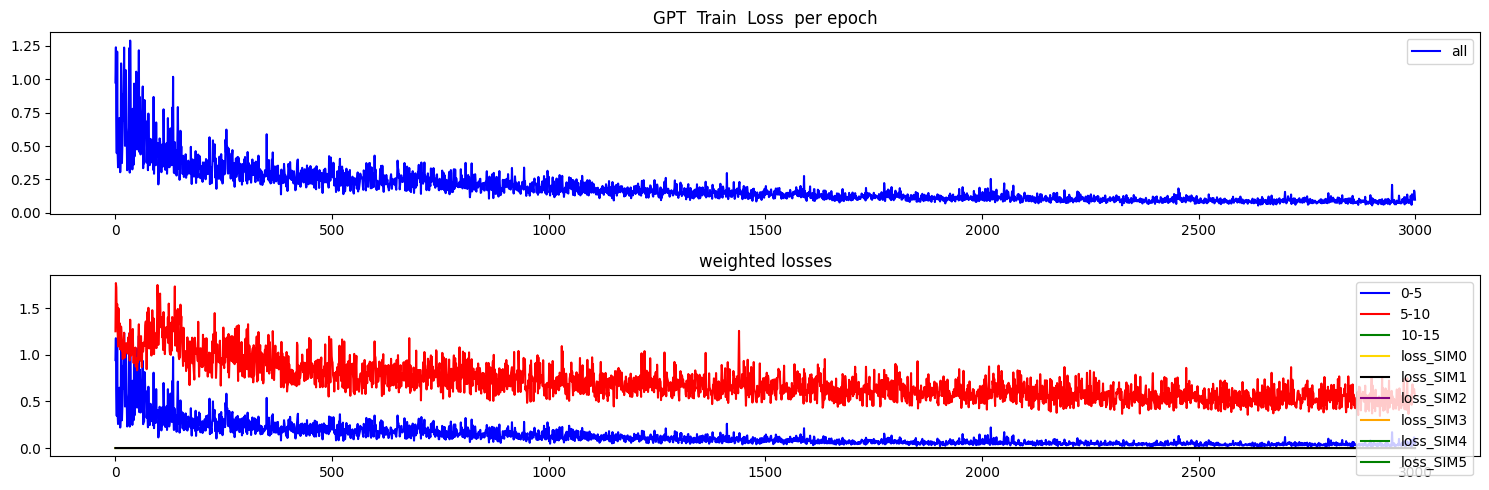

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


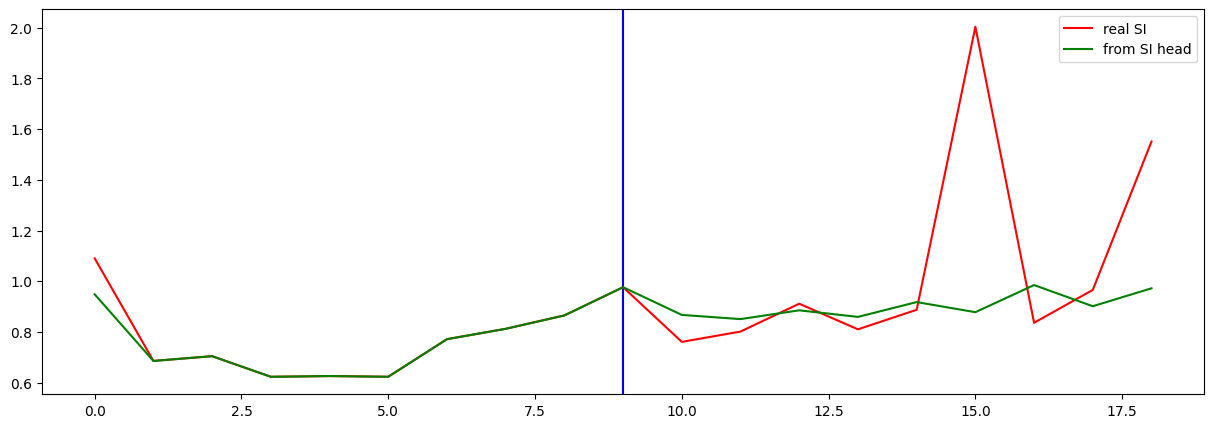

Testing R**2 - (all) - (no inputs):  0.9601951594634621
Testing R**2 - (f2) - SI full (no inputs):  -0.08212185405912753
Testing R**2 - SI head only (no inputs):  -0.19838238189688284
0 ...index R**2 (no inputs):  -0.011682215586949596
1 ...index R**2 (no inputs):  -0.5725014456573563
2 ...index R**2 (no inputs):  -0.08212185405912753
3 ...index R**2 (no inputs):  -0.6278836523253155
4 ...index R**2 (no inputs):  -0.09178303738106308
5 ...index R**2 (no inputs):  -0.9310281968161414
6 ...index R**2 (no inputs):  -19.918763038795266
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.14540188737576254
10 ...index R**2 (no inputs):  -0.00637611414427286
11 ...index R**2 (no inputs):  -2.5412507454670537
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7.281856466119786
16 ...index R**2 (no inputs):  -3.3430228754335225
17 ...index R**2 (no inputs):  -84

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.169799
Loss_SI: 1.1429321765899658 Loss_all: 1.4115961790084839
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.105125
Loss_SI: 0.040611375123262405 Loss_all: 0.6857452392578125
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.073041
Loss_SI: 0.024692043662071228 Loss_all: 0.5081782937049866
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.060335
Loss_SI: 0.02370942197740078 Loss_all: 0.3899671137332916
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.040297
Loss_SI: 0.009561579674482346 Loss_all: 0.3169175386428833
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.052387
Loss_SI: 0.01875932142138481 Loss_all: 0.3550317883491516
Prediction shape: torch.Size([32, 35])
===


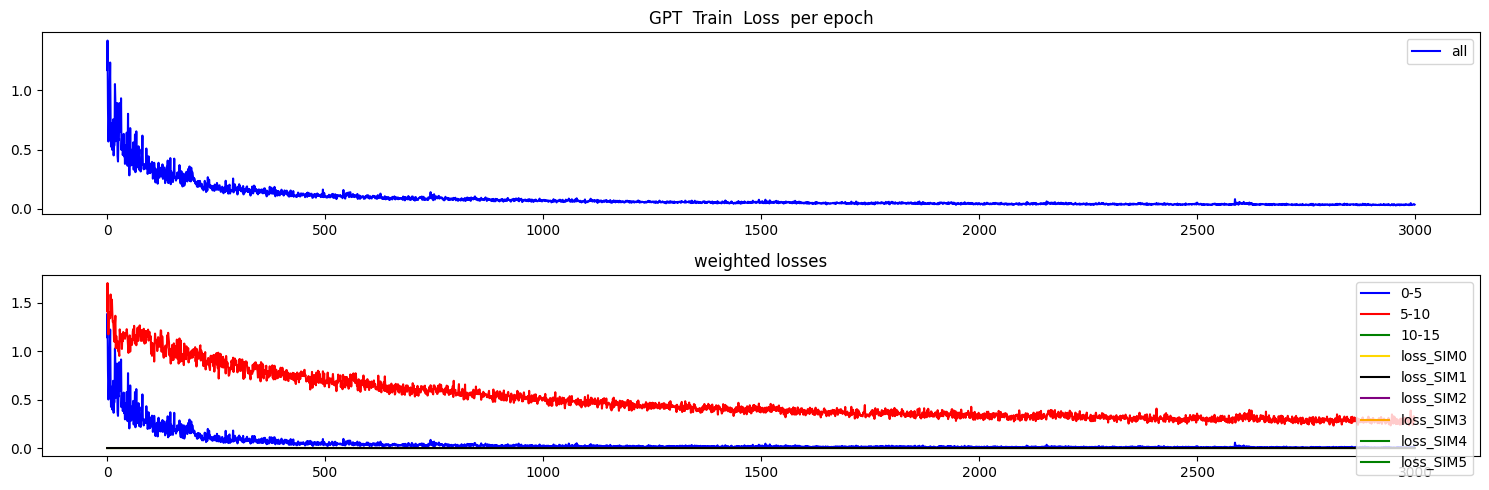

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


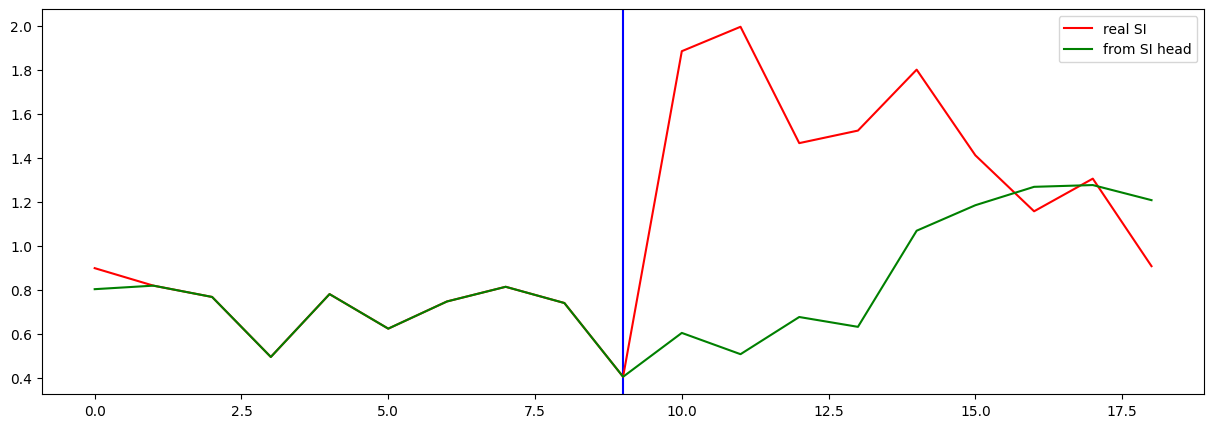

Testing R**2 - (all) - (no inputs):  -2.2838663674190753
Testing R**2 - (f2) - SI full (no inputs):  -4.707745295365
Testing R**2 - SI head only (no inputs):  -3.8314023890411955
0 ...index R**2 (no inputs):  -0.11671748393509662
1 ...index R**2 (no inputs):  -8.895564504914164
2 ...index R**2 (no inputs):  -4.707745295365
3 ...index R**2 (no inputs):  -49.07903791103204
4 ...index R**2 (no inputs):  -1.154156825104808
5 ...index R**2 (no inputs):  -38.28948498162728
6 ...index R**2 (no inputs):  -1.2263331316999562
7 ...index R**2 (no inputs):  -4.438098861619668
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.4480694798753864
10 ...index R**2 (no inputs):  -1.1992354119738229
11 ...index R**2 (no inputs):  -92.42449505185746
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  -0.253582673798334
15 ...index R**2 (no inputs):  -5.892407059852811
16 ...index R**2 (no inputs):  -0.23153366644652618
17 ...index R**2 (no i

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.466836
Loss_SI: 0.3823263645172119 Loss_all: 1.2274222373962402
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.125644
Loss_SI: 0.06564333289861679 Loss_all: 0.6656526923179626
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.081312
Loss_SI: 0.03801204636693001 Loss_all: 0.4710130989551544
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.072472
Loss_SI: 0.02906734123826027 Loss_all: 0.4631105065345764
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.067614
Loss_SI: 0.024295497685670853 Loss_all: 0.4574812948703766
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.050689
Loss_SI: 0.015019330196082592 Loss_all: 0.3717198371887207
Prediction shape: torch.Size([32, 35])
===


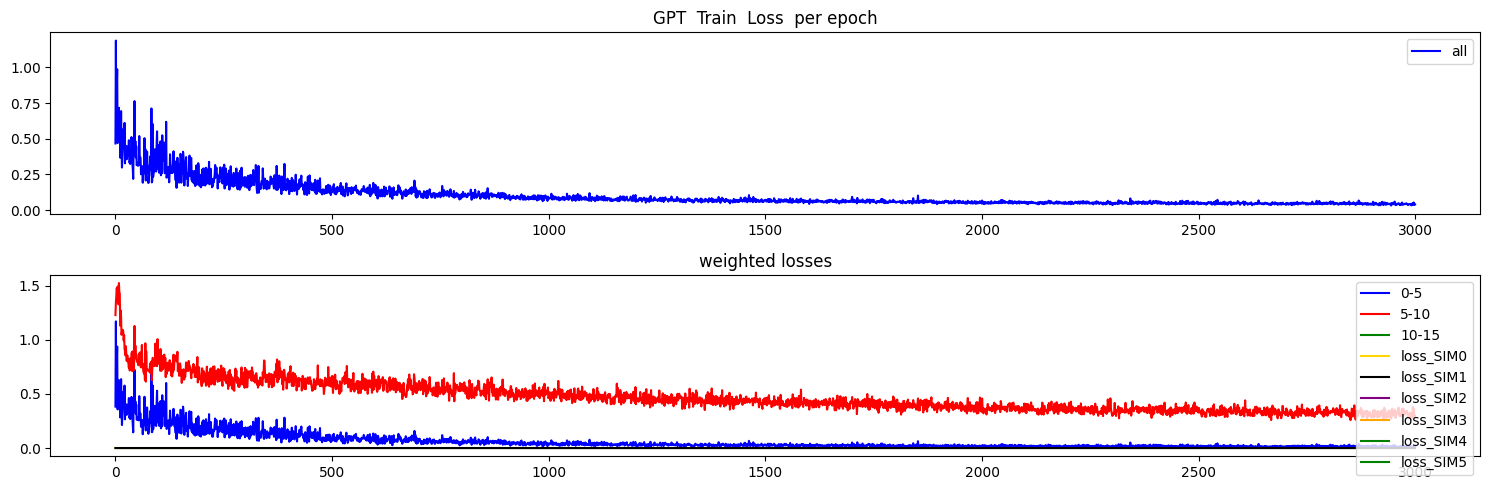

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


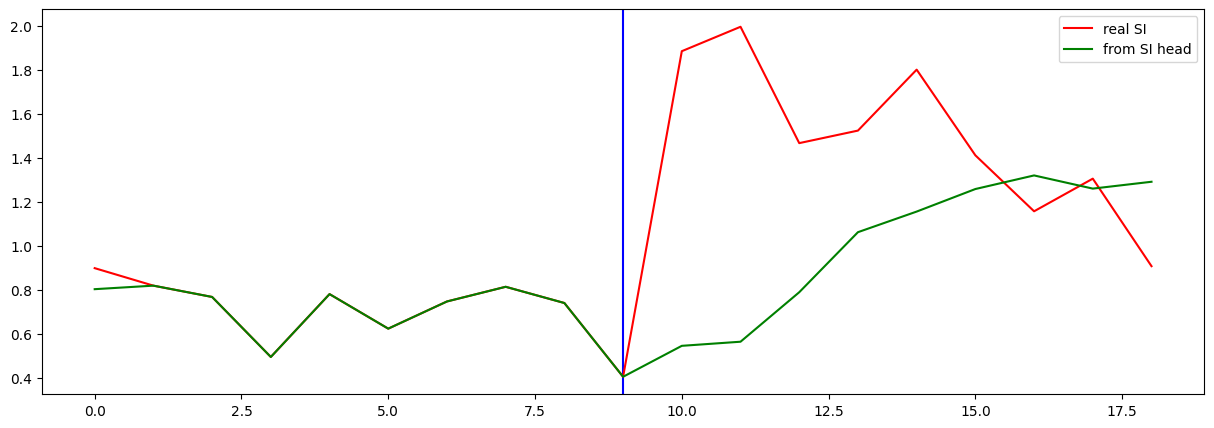

Testing R**2 - (all) - (no inputs):  -2.0361698244868136
Testing R**2 - (f2) - SI full (no inputs):  -2.540369879080957
Testing R**2 - SI head only (no inputs):  -2.9783643253840673
0 ...index R**2 (no inputs):  -0.12401711616214661
1 ...index R**2 (no inputs):  -3.5602449892420376
2 ...index R**2 (no inputs):  -2.540369879080957
3 ...index R**2 (no inputs):  -61.15591813503033
4 ...index R**2 (no inputs):  -0.7174470800611163
5 ...index R**2 (no inputs):  -35.32551268763169
6 ...index R**2 (no inputs):  -1.3343556316908436
7 ...index R**2 (no inputs):  -4.2062166252946005
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.17442788183428415
10 ...index R**2 (no inputs):  -4.364662600599619
11 ...index R**2 (no inputs):  -237.90295704088885
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  -0.2544324583026034
15 ...index R**2 (no inputs):  -3.746671470861017
16 ...index R**2 (no inputs):  0.1553658499742524
17 ...index R

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.600889
Loss_SI: 0.5424096584320068 Loss_all: 1.1271992921829224
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.311253
Loss_SI: 0.25432416796684265 Loss_all: 0.8236103653907776
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.156654
Loss_SI: 0.12229354679584503 Loss_all: 0.4658951163291931
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.112427
Loss_SI: 0.0718657374382019 Loss_all: 0.47747549414634705
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.096111
Loss_SI: 0.05166412517428398 Loss_all: 0.49613481760025024
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.101744
Loss_SI: 0.03531705588102341 Loss_all: 0.6995859742164612
Prediction shape: torch.Size([32, 35])
===


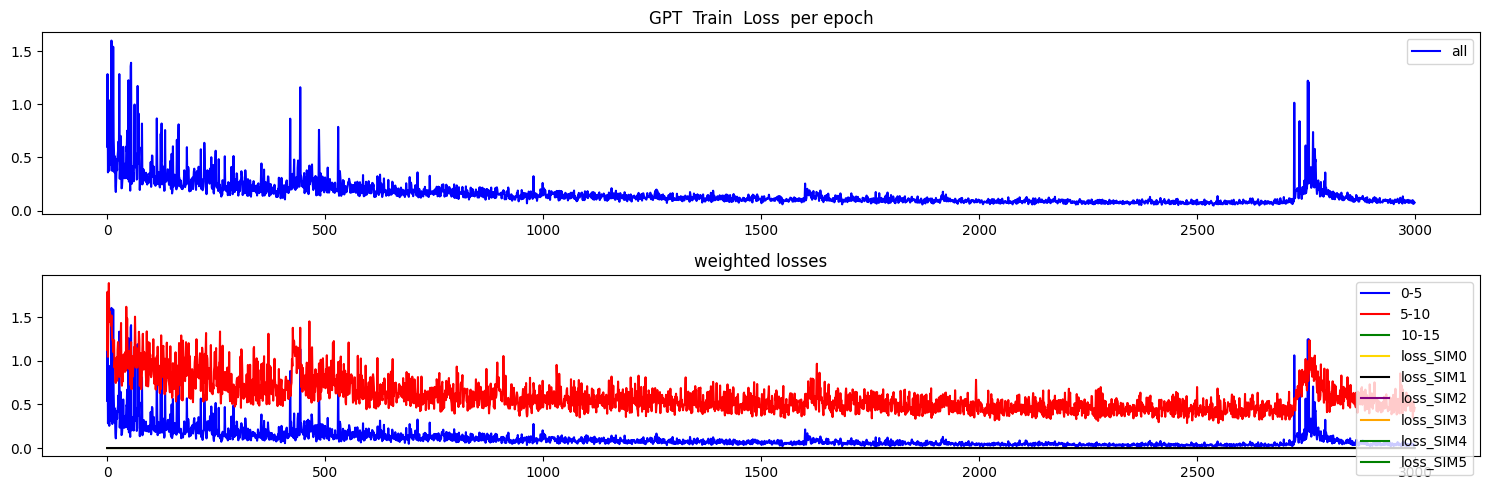

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


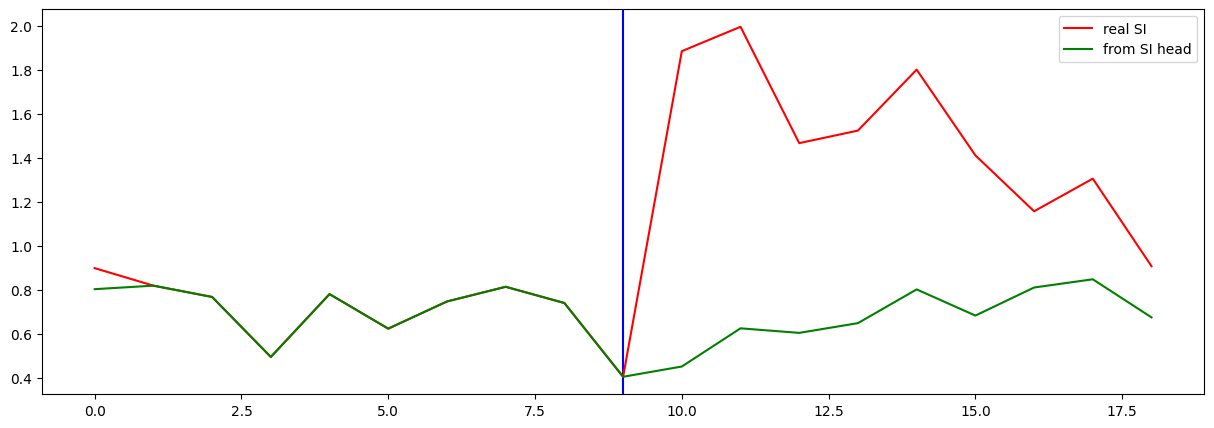

Testing R**2 - (all) - (no inputs):  -1.6415147507105274
Testing R**2 - (f2) - SI full (no inputs):  -3.8964099525652776
Testing R**2 - SI head only (no inputs):  -4.624388804960172
0 ...index R**2 (no inputs):  -0.6759383171735001
1 ...index R**2 (no inputs):  -7.848321515109049
2 ...index R**2 (no inputs):  -3.8964099525652776
3 ...index R**2 (no inputs):  -50.12052167841241
4 ...index R**2 (no inputs):  -0.9838271780184198
5 ...index R**2 (no inputs):  -30.58003107040441
6 ...index R**2 (no inputs):  -1.810993119542354
7 ...index R**2 (no inputs):  -6.677587155228555
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.20162404876703688
10 ...index R**2 (no inputs):  -1.3614037018411338
11 ...index R**2 (no inputs):  -1369.9048939981276
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  -0.29057118890507083
15 ...index R**2 (no inputs):  -0.8714338313702237
16 ...index R**2 (no inputs):  -0.29161185250143107
17 ...index

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.664829
Loss_SI: 0.5895261168479919 Loss_all: 1.342555046081543
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.255641
Loss_SI: 0.20905719697475433 Loss_all: 0.6748965978622437
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.149805
Loss_SI: 0.1085653230547905 Loss_all: 0.520964503288269
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.103583
Loss_SI: 0.06975345313549042 Loss_all: 0.4080533981323242
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.095950
Loss_SI: 0.0448206290602684 Loss_all: 0.5561129450798035
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.117622
Loss_SI: 0.06649897992610931 Loss_all: 0.5777292847633362
Prediction shape: torch.Size([32, 35])
===


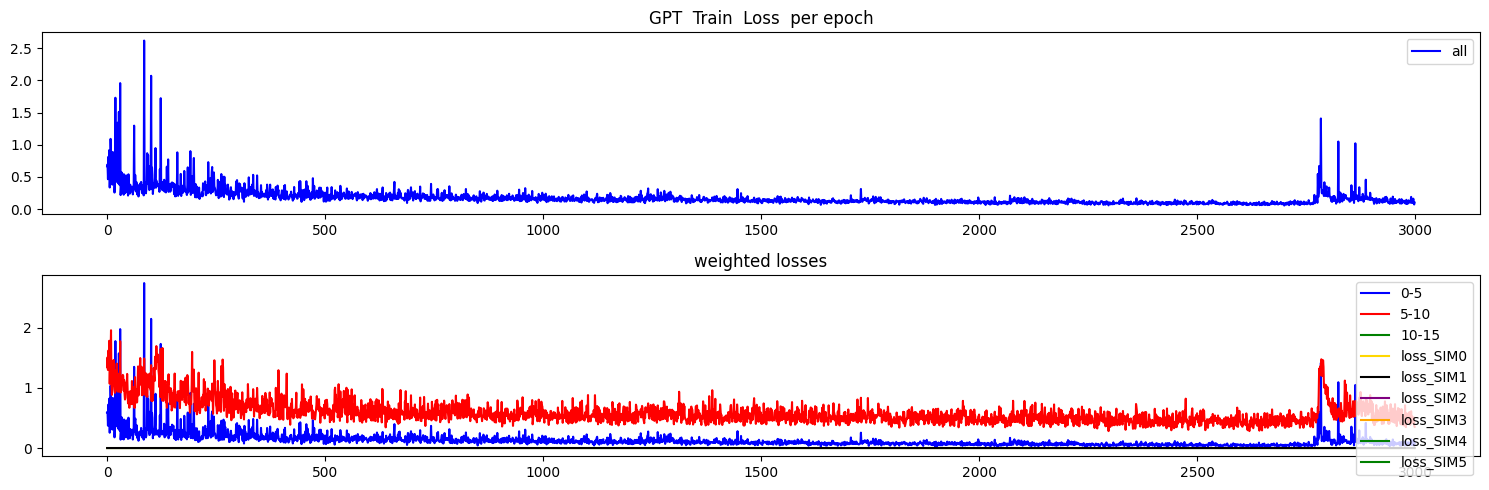

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


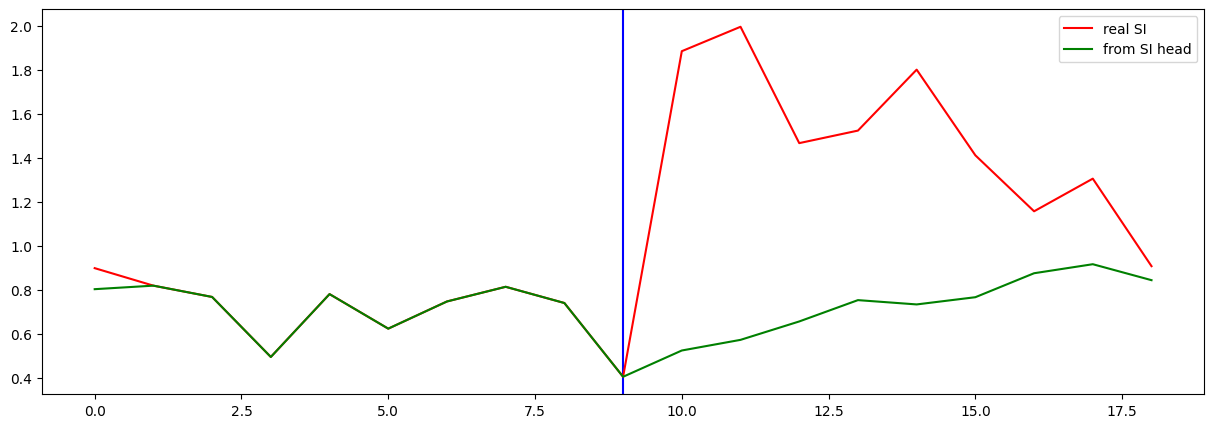

Testing R**2 - (all) - (no inputs):  -1.7383157932746585
Testing R**2 - (f2) - SI full (no inputs):  -3.5359798101744238
Testing R**2 - SI head only (no inputs):  -4.1255869866273684
0 ...index R**2 (no inputs):  -0.2291066937904278
1 ...index R**2 (no inputs):  -3.565591062911815
2 ...index R**2 (no inputs):  -3.5359798101744238
3 ...index R**2 (no inputs):  -32.87941800754088
4 ...index R**2 (no inputs):  -11.40380992547602
5 ...index R**2 (no inputs):  -31.475567720780205
6 ...index R**2 (no inputs):  -0.8075073540830526
7 ...index R**2 (no inputs):  -1.6682110297971118
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.06018680829197376
10 ...index R**2 (no inputs):  -1.3044497094090257
11 ...index R**2 (no inputs):  -163.81070861756004
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  -0.5437197283708057
15 ...index R**2 (no inputs):  -0.7177275452315224
16 ...index R**2 (no inputs):  -0.3795260091917092
17 ...index

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.7688916756535324


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.7824840356176472


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -1.3182712714444649


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -1.0775774905440354



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: -0.43662020532271173
2 .....R² on first n steps: -0.6770733510027502
3 .....R² on first n steps: -0.8183218071309832
4 .....R² on first n steps: -0.9704539685409146
5 .....R² on first n steps: -0.8596604535685386
6 .....R² on first n steps: -0.8185926602727527
7 .....R² on first n steps: -0.782212378707777
8 .....R² on first n steps: -0.7784732546343582
9 .....R² on first n steps: -0.7688916756535324


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: -0.5533689957651657
2 .....R² on first n steps: -0.6977044573321676
3 .....R² on first n steps: -0.7560555197496333
4 .....R² on first n steps: -0.6485537176086082
5 .....R² on first n steps: -0.7765978806801319
6 .....R² on first n steps: -0.790471292396155
7 .....R² on first n steps: -0.7653421486280172
8 .....R² on first n steps: -0.7676076992364804
9 .....R² on first n steps: -0.7824840356176472


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: -0.7456638176710702
2 .....R² on first n steps: -0.8037976990968037
3 .....R² on first n steps: -1.0424324933894984
4 .....R² on first n steps: -1.169184300730644
5 .....R² on first n steps: -1.1588236582415838
6 .....R² on first n steps: -1.0823557179180403
7 .....R² on first n steps: -0.9686803015180123
8 .....R² on first n steps: -1.1480393106737612
9 .....R² on first n steps: -1.3182712714444649


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: -0.645815546126056
2 .....R² on first n steps: -0.7464934203834463
3 .....R² on first n steps: -0.8829167916814051
4 .....R² on first n steps: -1.0554270085869129
5 .....R² on first n steps: -1.1022113364940904
6 .....R² on first n steps: -1.1931883804212005
7 .....R² on first n steps: -1.158962696423877
8 .....R² on first n steps: -1.1127513012146992
9 .....R² on first n steps: -1.0775774905440354



## Plot


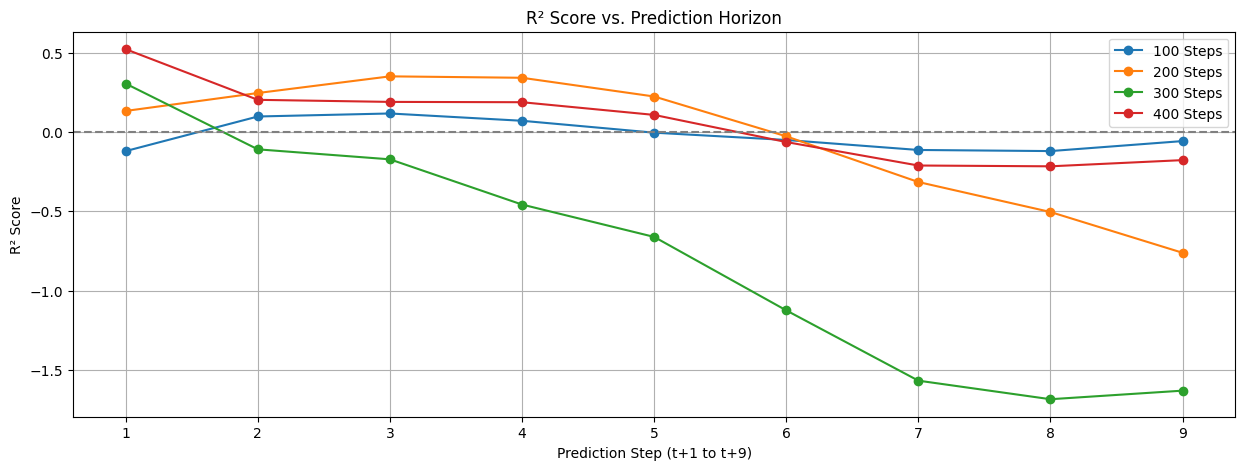

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
